In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import cv2 
from glob import glob 
import itertools
import os

In [2]:
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


# 데이터 로드

In [211]:
path_to_images = 'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train/*/*.jpg'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1

In [212]:
#READING IMAGES
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    traininglabels.append(i.split('\\')[-2])
    count=count+1

In [11]:
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

In [21]:
TRAIN_DATA_FOLDER = "C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train"

In [22]:
images_per_class = {}
for class_folder_name in os.listdir(TRAIN_DATA_FOLDER):
    class_folder_path = os.path.join(TRAIN_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

In [19]:
# Train Data 클래스 별 개수

for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

buildings -> 2191
forest -> 2271
glacier -> 2404
mountain -> 2512
sea -> 2274
street -> 2382


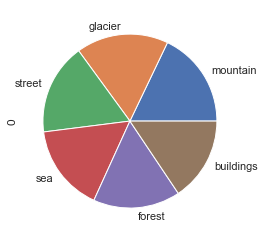

In [20]:
traininglabels[0].value_counts().plot(kind='pie') #train 데이터 분포 확인

# 이미지 증식

In [21]:
#이미지 증식
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True, shear_range=0.2, zoom_range=0.2, validation_split=0.1)


In [22]:
train_generator=train_datagen.flow_from_directory(
    'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train/',
    target_size=(150,150),
    batch_size=64,
    class_mode='sparse',
    seed=2209,
    subset='training'
)

validation_generator=train_datagen.flow_from_directory(
    'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train/',
    target_size=(150,150),
    batch_size=64,
    class_mode='sparse',
    seed=2209,
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale = 1./255.)

test_generator=test_datagen.flow_from_directory(
    'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_test/seg_test/',
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209,
)

test1_datagen = ImageDataGenerator(rescale=1./255.)
test1_generator = test1_datagen.flow_from_directory(
    'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_test/seg_test/',
    target_size=(150,150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=2209
)

                                                    


Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [23]:
SEED = 2209

import random as rn
import numpy as np
from tensorflow import set_random_seed

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_random_seed(SEED)
rn.seed(SEED)

# CNN 모델 학습

In [24]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')

model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  steps_per_epoch=int(12632/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reduce],
  verbose=1
)

Epoch 1/50
198/198 [==============================] - 104s 524ms/step - loss: 0.5939 - acc: 0.8126 - val_loss: 0.7459 - val_acc: 0.7254
Epoch 2/50
198/198 [==============================] - 88s 446ms/step - loss: 0.5676 - acc: 0.8262 - val_loss: 0.9600 - val_acc: 0.6876
Epoch 3/50
198/198 [==============================] - 84s 426ms/step - loss: 0.5636 - acc: 0.8254 - val_loss: 0.6087 - val_acc: 0.7989
Epoch 4/50
198/198 [==============================] - 84s 426ms/step - loss: 0.5549 - acc: 0.8342 - val_loss: 0.6194 - val_acc: 0.8060
Epoch 5/50
198/198 [==============================] - 87s 441ms/step - loss: 0.5374 - acc: 0.8388 - val_loss: 0.6479 - val_acc: 0.7953
Epoch 6/50
198/198 [==============================] - 90s 457ms/step - loss: 0.5262 - acc: 0.8399 - val_loss: 0.5947 - val_acc: 0.8031
Epoch 7/50
198/198 [==============================] - 85s 429ms/step - loss: 0.5183 - acc: 0.8467 - val_loss: 0.5058 - val_acc: 0.8260
Epoch 8/50
198/198 [==============================] - 

In [30]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

 - 8s - loss: 0.3303 - acc: 0.8987
Accuracy of the model on the test set:  0.8986667


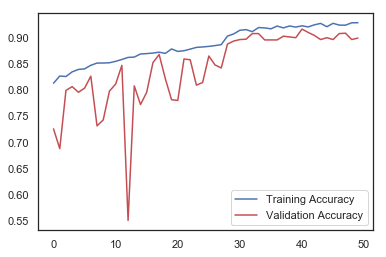

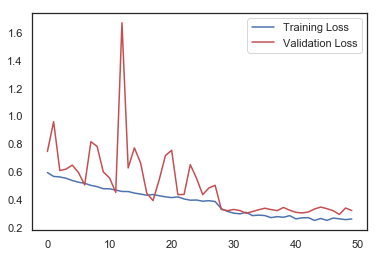

In [31]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# ResNet-50

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Sequential,Input,Model

from keras.initializers import *


In [4]:
datasets = ['C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train','C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_test/seg_test']

In [5]:
output = []
class_names = ['buildings','forest','glacier','mountain','sea','street']

class_name_labels = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
class_name_labels



{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [6]:
from tqdm import tqdm

def load_data():
    for dataset in datasets:
        print("Loading {}".format(dataset))

        images,labels = [],[]

        for folder in os.listdir(dataset):
            label = class_name_labels[folder]
            
            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            
                img_path = os.path.join(os.path.join(dataset,folder),file)

                img = cv2.imread(img_path,cv2.IMREAD_COLOR)
                img = cv2.resize(img,(150,150))

                images.append(img)
                labels.append(label)
                pass
            pass
        
        images = np.array(images,dtype=np.float32)
        labels = np.array(labels,dtype=np.float32)

        output.append((images,labels))
        pass

    return output
    pass

In [7]:
(train_images,train_labels),(test_images,test_labels) = load_data()

Loading C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train


100%|█████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:04<00:00, 589.57it/s]


Loading C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_test/seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 599.47it/s]


In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

_, train_count = np.unique(train_labels, return_counts=True)
_, test_count = np.unique(test_labels, return_counts=True)

df = pd.DataFrame(data = [train_count,test_count])
df = df.T
df['Index']=['buildings','forest','glacier','mountain','sea','street']
df.columns = ['Train','Test','Name']
df

,Train,Test,Name
0,2191,437,buildings
1,2271,474,forest
2,2404,553,glacier
3,2512,525,mountain
4,2274,510,sea
5,2382,501,street


<Figure size 432x288 with 0 Axes>

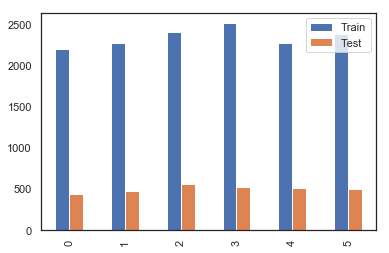

In [9]:
plt.figure()
df.plot.bar()

In [10]:
def show_final_history(history):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('Loss')
    ax[1].set_title("Accuracy")
    ax[0].plot(history.history['loss'],label='Train Loss')
    ax[0].plot(history.history['val_loss'],label='Test loss')
    ax[1].plot(history.history['accuracy'],label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
    
#     ax.set_ylim(20)
    
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='lower right')

In [11]:
train_dir = 'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_train/seg_train'
test_dir = 'C:/Users/Q_lab_laptop/Desktop/AI_Project/imageset/seg_test/seg_test'
batch_size = 32

IGD = ImageDataGenerator(rescale=1./255)
train_generator = IGD.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=True)
test_generator = IGD.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=True)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
nb_classes = len(train_generator.class_indices)
nb_classes

6

In [13]:
def identity_block(X,f,filters,stage,block):
    
    conv_name_base = 'res_'+str(stage)+block+'_branch'
    bn_name_base = 'bn_'+str(stage)+block+'_branch'
    
    F1,F2,F3 = filters
    
    X_shortcut = X
    
    # First Component of Main Path
    X = Conv2D(filters=F1,kernel_size=(3,3),strides=(1,1),
               padding='same',name=conv_name_base+'2a',
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)
    
    # Second Component of Main Path
    X = Conv2D(filters=F2,kernel_size=(f,f),strides=(1,1),
              padding='same',name=conv_name_base+'2b',
              kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)
    
    # Third Component of Main Path
    X = Conv2D(filters=F3,kernel_size=(3,3),strides=(1,1),
              padding='same',name=conv_name_base+'2c',
              kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base+'2c')(X)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X
    pass

In [14]:
def convolutional_block(X,f,filters,stage,block,s=2):
    
    conv_base_name = 'res_' + str(stage) + block + '_branch'
    bn_base_name = 'bn_' + str(stage) + block + '_branch'
    
    F1,F2,F3 = filters
    
    X_shortcut = X
    
    ### MAIN PATH ###
    # First component of main path
    X = Conv2D(filters=F1,kernel_size=(3,3),strides=(s,s),
              padding='same',name=conv_base_name+'2a',
              kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_base_name+'2a')(X)
    X = Activation('relu')(X)
    
    # Second Component of main path
    X = Conv2D(filters=F2,kernel_size=(f,f),strides=(1,1),
              padding='same',name=conv_base_name+'2b',
              kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_base_name+'2b')(X)
    X = Activation('relu')(X)
    
    # Third Component of main path
    X = Conv2D(filters=F3,kernel_size=(3,3),strides=(1,1),
              padding='same',name=conv_base_name+'2c',
              kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_base_name+'2c')(X)
    
    # Shortcut path
    X_shortcut = Conv2D(filters=F3,kernel_size=(1,1),strides=(s,s),
                       padding='same',name=conv_base_name+'1',
                       kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name=bn_base_name+'1')(X_shortcut)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X
    pass

In [15]:
def ResNet(input_shape,classes):
    
    X_input = Input(input_shape)
    
    # Zero Padding
    X = ZeroPadding2D((3,3))(X_input)
    
    # Stage 1
    X = Conv2D(64,(7,7),strides=(2,2),name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides=(2,2))(X)
    
    # Stage 2
    X = convolutional_block(X,f=3,filters=[64,64,128],stage=2,block='A',s=1)
    X = identity_block(X,3,[64,64,128],stage=2,block='B')
    X = identity_block(X,3,[64,64,128],stage=2,block='C')
    
    # Stage 3
    X = convolutional_block(X,f=3,filters=[128,128,256],stage=3,block='A',s=2)
    X = identity_block(X,f=3,filters=[128,128,256],stage=3,block='B')
    X = identity_block(X,f=3,filters=[128,128,256],stage=3,block='C')
    X = identity_block(X,f=3,filters=[128,128,256],stage=3,block='D')
    
    # Stage 4
    X = convolutional_block(X,f=3,filters=[256,256,512],stage=4,block='A',s=2)
    X = identity_block(X,f=3,filters=[256,256,512],stage=4,block='B')
    X = identity_block(X,f=3,filters=[256,256,512],stage=4,block='C')
    X = identity_block(X,f=3,filters=[256,256,512],stage=4,block='D')
    X = identity_block(X,f=3,filters=[256,256,512],stage=4,block='E')
    X = identity_block(X,f=3,filters=[256,256,512],stage=4,block='F')
    
    # Stage 5
    X = convolutional_block(X,f=3,filters=[512,512,1024],stage=5,block='A',s=1)
    X = identity_block(X,f=3,filters=[512,512,1024],stage=5,block='B')
    X = identity_block(X,f=3,filters=[512,512,1024],stage=5,block='C')
    
#     # Stage 6
#     X = convolutional_block(X,f=3,filters=[1024,1024,2048],stage=6,block='A',s=2)
#     X = identity_block(X,f=3,filters=[1024,1024,2048],stage=6,block='B')
#     X = identity_block(X,f=3,filters=[1024,1024,2048],stage=6,block='C')
#     X = identity_block(X,f=3,filters=[1024,1024,2048],stage=6,block='D')
    
    # Average Pool Layer
    X = AveragePooling2D((2,2),name="avg_pool")(X)
    
    # Output layer
    X = Flatten()(X)
    X = Dense(classes,activation='softmax',name='fc'+str(classes),
              kernel_initializer=glorot_uniform(seed=0))(X)
    
    model = Model(inputs=X_input,outputs=X,name='ResNet')
    
    return model
    pass

In [16]:
model = ResNet(input_shape=(150,150,3),classes=nb_classes)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

res_3A_branch2a (Conv2D)        (None, 19, 19, 128)  147584      activation_10[0][0]              
__________________________________________________________________________________________________
bn_3A_branch2a (BatchNormalizat (None, 19, 19, 128)  512         res_3A_branch2a[0][0]            
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 19, 19, 128)  0           bn_3A_branch2a[0][0]             
__________________________________________________________________________________________________
res_3A_branch2b (Conv2D)        (None, 19, 19, 128)  147584      activation_11[0][0]              
__________________________________________________________________________________________________
bn_3A_branch2b (BatchNormalizat (None, 19, 19, 128)  512         res_3A_branch2b[0][0]            
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
add_7 (Add)                     (None, 19, 19, 256)  0           bn_3D_branch2c[0][0]             
                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 19, 19, 256)  0           add_7[0][0]                      
__________________________________________________________________________________________________
res_4A_branch2a (Conv2D)        (None, 10, 10, 256)  590080      activation_22[0][0]              
__________________________________________________________________________________________________
bn_4A_branch2a (BatchNormalizat (None, 10, 10, 256)  1024        res_4A_branch2a[0][0]            
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
activation_33 (Activation)      (None, 10, 10, 256)  0           bn_4D_branch2b[0][0]             
__________________________________________________________________________________________________
res_4D_branch2c (Conv2D)        (None, 10, 10, 512)  1180160     activation_33[0][0]              
__________________________________________________________________________________________________
bn_4D_branch2c (BatchNormalizat (None, 10, 10, 512)  2048        res_4D_branch2c[0][0]            
__________________________________________________________________________________________________
add_11 (Add)                    (None, 10, 10, 512)  0           bn_4D_branch2c[0][0]             
                                                                 activation_31[0][0]              
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
activation_44 (Activation)      (None, 10, 10, 512)  0           bn_5B_branch2a[0][0]             
__________________________________________________________________________________________________
res_5B_branch2b (Conv2D)        (None, 10, 10, 512)  2359808     activation_44[0][0]              
__________________________________________________________________________________________________
bn_5B_branch2b (BatchNormalizat (None, 10, 10, 512)  2048        res_5B_branch2b[0][0]            
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 10, 10, 512)  0           bn_5B_branch2b[0][0]             
__________________________________________________________________________________________________
res_5B_branch2c (Conv2D)        (None, 10, 10, 1024) 4719616     activation_45[0][0]              
__________

In [18]:
opt = SGD(lr=0.0001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',verbose=1,
                              save_best_only=True,mode='max')
callbacks_list=[checkpoint]

In [20]:
epochs = 30
history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = train_generator.n//batch_size,
                              epochs = epochs,
                              validation_data = test_generator,
                              validation_steps = test_generator.n//batch_size,
                              callbacks = callbacks_list,
                              verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30


204/438 [============>.................] - ETA: 2:08:27 - loss: 3.2015 - acc: 0.12 - ETA: 1:08:02 - loss: 2.9243 - acc: 0.09 - ETA: 47:53 - loss: 2.6011 - acc: 0.1458 - ETA: 37:48 - loss: 2.4034 - acc: 0.16 - ETA: 31:44 - loss: 2.3186 - acc: 0.16 - ETA: 27:41 - loss: 2.3623 - acc: 0.15 - ETA: 24:48 - loss: 2.3534 - acc: 0.17 - ETA: 22:37 - loss: 2.2995 - acc: 0.18 - ETA: 20:55 - loss: 2.2867 - acc: 0.19 - ETA: 19:34 - loss: 2.3962 - acc: 0.18 - ETA: 18:27 - loss: 2.3768 - acc: 0.19 - ETA: 17:31 - loss: 2.3742 - acc: 0.19 - ETA: 16:43 - loss: 2.3854 - acc: 0.18 - ETA: 16:02 - loss: 2.3966 - acc: 0.19 - ETA: 15:26 - loss: 2.4608 - acc: 0.19 - ETA: 14:55 - loss: 2.4617 - acc: 0.19 - ETA: 14:27 - loss: 2.4398 - acc: 0.19 - ETA: 14:02 - loss: 2.4569 - acc: 0.18 - ETA: 13:40 - loss: 2.4281 - acc: 0.19 - ETA: 13:20 - loss: 2.4290 - acc: 0.19 - ETA: 13:02 - loss: 2.4542 - acc: 0.19 - ETA: 12:45 - loss: 2.4841 - acc: 0.19 - ETA: 12:29 - loss: 2.4881 - acc: 0.19 - ETA: 12:15 - loss: 2.5346 - acc

409/438 [===========================>..] - ETA: 4:32 - loss: 2.1871 - acc: 0.321 - ETA: 4:30 - loss: 2.1846 - acc: 0.322 - ETA: 4:29 - loss: 2.1842 - acc: 0.322 - ETA: 4:28 - loss: 2.1794 - acc: 0.323 - ETA: 4:27 - loss: 2.1759 - acc: 0.324 - ETA: 4:25 - loss: 2.1734 - acc: 0.324 - ETA: 4:24 - loss: 2.1700 - acc: 0.325 - ETA: 4:23 - loss: 2.1702 - acc: 0.325 - ETA: 4:22 - loss: 2.1669 - acc: 0.326 - ETA: 4:20 - loss: 2.1633 - acc: 0.326 - ETA: 4:19 - loss: 2.1597 - acc: 0.327 - ETA: 4:18 - loss: 2.1602 - acc: 0.328 - ETA: 4:17 - loss: 2.1591 - acc: 0.328 - ETA: 4:15 - loss: 2.1583 - acc: 0.328 - ETA: 4:14 - loss: 2.1556 - acc: 0.329 - ETA: 4:13 - loss: 2.1536 - acc: 0.330 - ETA: 4:12 - loss: 2.1549 - acc: 0.330 - ETA: 4:11 - loss: 2.1518 - acc: 0.331 - ETA: 4:09 - loss: 2.1526 - acc: 0.330 - ETA: 4:08 - loss: 2.1500 - acc: 0.331 - ETA: 4:07 - loss: 2.1492 - acc: 0.331 - ETA: 4:06 - loss: 2.1516 - acc: 0.331 - ETA: 4:04 - loss: 2.1492 - acc: 0.331 - ETA: 4:03 - loss: 2.1465 - acc: 0.331

438/438 [==============================] - ETA: 31s - loss: 1.9586 - acc: 0.39 - ETA: 30s - loss: 1.9571 - acc: 0.39 - ETA: 29s - loss: 1.9554 - acc: 0.39 - ETA: 28s - loss: 1.9542 - acc: 0.39 - ETA: 27s - loss: 1.9522 - acc: 0.39 - ETA: 25s - loss: 1.9505 - acc: 0.39 - ETA: 24s - loss: 1.9494 - acc: 0.39 - ETA: 23s - loss: 1.9503 - acc: 0.39 - ETA: 22s - loss: 1.9485 - acc: 0.39 - ETA: 21s - loss: 1.9478 - acc: 0.39 - ETA: 20s - loss: 1.9481 - acc: 0.39 - ETA: 19s - loss: 1.9483 - acc: 0.39 - ETA: 18s - loss: 1.9467 - acc: 0.39 - ETA: 16s - loss: 1.9445 - acc: 0.39 - ETA: 15s - loss: 1.9441 - acc: 0.39 - ETA: 14s - loss: 1.9443 - acc: 0.39 - ETA: 13s - loss: 1.9435 - acc: 0.39 - ETA: 12s - loss: 1.9414 - acc: 0.39 - ETA: 11s - loss: 1.9403 - acc: 0.39 - ETA: 10s - loss: 1.9400 - acc: 0.39 - ETA: 9s - loss: 1.9380 - acc: 0.3979 - ETA: 7s - loss: 1.9396 - acc: 0.398 - ETA: 6s - loss: 1.9373 - acc: 0.398 - ETA: 5s - loss: 1.9370 - acc: 0.398 - ETA: 4s - loss: 1.9350 - acc: 0.399 - ETA: 3

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/30


204/438 [============>.................] - ETA: 24:07 - loss: 1.6787 - acc: 0.50 - ETA: 16:04 - loss: 1.6436 - acc: 0.51 - ETA: 13:22 - loss: 1.5657 - acc: 0.55 - ETA: 11:59 - loss: 1.5694 - acc: 0.55 - ETA: 11:10 - loss: 1.5201 - acc: 0.55 - ETA: 10:37 - loss: 1.4939 - acc: 0.56 - ETA: 10:13 - loss: 1.4276 - acc: 0.55 - ETA: 9:54 - loss: 1.4877 - acc: 0.5625 - ETA: 9:39 - loss: 1.4614 - acc: 0.555 - ETA: 9:27 - loss: 1.4268 - acc: 0.553 - ETA: 9:18 - loss: 1.4591 - acc: 0.539 - ETA: 9:09 - loss: 1.4686 - acc: 0.536 - ETA: 9:02 - loss: 1.4489 - acc: 0.543 - ETA: 8:55 - loss: 1.4270 - acc: 0.542 - ETA: 8:50 - loss: 1.4083 - acc: 0.537 - ETA: 8:44 - loss: 1.3765 - acc: 0.543 - ETA: 8:40 - loss: 1.4093 - acc: 0.534 - ETA: 8:35 - loss: 1.4201 - acc: 0.529 - ETA: 8:31 - loss: 1.4248 - acc: 0.523 - ETA: 8:28 - loss: 1.4137 - acc: 0.528 - ETA: 8:24 - loss: 1.4086 - acc: 0.528 - ETA: 8:21 - loss: 1.4190 - acc: 0.528 - ETA: 8:18 - loss: 1.4258 - acc: 0.525 - ETA: 8:15 - loss: 1.4237 - acc: 0.52

410/438 [===========================>..] - ETA: 4:19 - loss: 1.4637 - acc: 0.532 - ETA: 4:18 - loss: 1.4634 - acc: 0.531 - ETA: 4:17 - loss: 1.4679 - acc: 0.530 - ETA: 4:16 - loss: 1.4672 - acc: 0.529 - ETA: 4:15 - loss: 1.4660 - acc: 0.530 - ETA: 4:14 - loss: 1.4647 - acc: 0.530 - ETA: 4:13 - loss: 1.4626 - acc: 0.530 - ETA: 4:11 - loss: 1.4618 - acc: 0.529 - ETA: 4:10 - loss: 1.4634 - acc: 0.530 - ETA: 4:09 - loss: 1.4626 - acc: 0.529 - ETA: 4:08 - loss: 1.4625 - acc: 0.530 - ETA: 4:07 - loss: 1.4604 - acc: 0.530 - ETA: 4:06 - loss: 1.4591 - acc: 0.530 - ETA: 4:05 - loss: 1.4593 - acc: 0.530 - ETA: 4:04 - loss: 1.4573 - acc: 0.531 - ETA: 4:02 - loss: 1.4564 - acc: 0.532 - ETA: 4:01 - loss: 1.4571 - acc: 0.532 - ETA: 4:00 - loss: 1.4585 - acc: 0.531 - ETA: 3:59 - loss: 1.4649 - acc: 0.530 - ETA: 3:58 - loss: 1.4649 - acc: 0.531 - ETA: 3:57 - loss: 1.4638 - acc: 0.531 - ETA: 3:56 - loss: 1.4641 - acc: 0.532 - ETA: 3:55 - loss: 1.4641 - acc: 0.531 - ETA: 3:53 - loss: 1.4637 - acc: 0.531

438/438 [==============================] - ETA: 29s - loss: 1.3907 - acc: 0.55 - ETA: 28s - loss: 1.3917 - acc: 0.55 - ETA: 27s - loss: 1.3920 - acc: 0.55 - ETA: 26s - loss: 1.3907 - acc: 0.55 - ETA: 25s - loss: 1.3908 - acc: 0.55 - ETA: 24s - loss: 1.3902 - acc: 0.55 - ETA: 23s - loss: 1.3898 - acc: 0.55 - ETA: 22s - loss: 1.3880 - acc: 0.55 - ETA: 21s - loss: 1.3867 - acc: 0.55 - ETA: 19s - loss: 1.3854 - acc: 0.55 - ETA: 18s - loss: 1.3863 - acc: 0.55 - ETA: 17s - loss: 1.3880 - acc: 0.55 - ETA: 16s - loss: 1.3891 - acc: 0.55 - ETA: 15s - loss: 1.3884 - acc: 0.55 - ETA: 14s - loss: 1.3892 - acc: 0.55 - ETA: 13s - loss: 1.3889 - acc: 0.55 - ETA: 12s - loss: 1.3886 - acc: 0.55 - ETA: 11s - loss: 1.3877 - acc: 0.55 - ETA: 9s - loss: 1.3861 - acc: 0.5549 - ETA: 8s - loss: 1.3853 - acc: 0.554 - ETA: 7s - loss: 1.3851 - acc: 0.555 - ETA: 6s - loss: 1.3849 - acc: 0.555 - ETA: 5s - loss: 1.3832 - acc: 0.555 - ETA: 4s - loss: 1.3825 - acc: 0.555 - ETA: 3s - loss: 1.3817 - acc: 0.555 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 1.2046 - acc: 0.656 - ETA: 7:09 - loss: 0.9950 - acc: 0.661 - ETA: 7:24 - loss: 0.9472 - acc: 0.659 - ETA: 7:31 - loss: 1.2378 - acc: 0.604 - ETA: 7:35 - loss: 1.2447 - acc: 0.589 - ETA: 7:37 - loss: 1.1986 - acc: 0.595 - ETA: 7:38 - loss: 1.1582 - acc: 0.595 - ETA: 7:39 - loss: 1.1818 - acc: 0.599 - ETA: 7:39 - loss: 1.1805 - acc: 0.588 - ETA: 7:39 - loss: 1.2352 - acc: 0.582 - ETA: 7:39 - loss: 1.2152 - acc: 0.591 - ETA: 7:39 - loss: 1.1852 - acc: 0.599 - ETA: 7:38 - loss: 1.1680 - acc: 0.606 - ETA: 7:37 - loss: 1.1805 - acc: 0.614 - ETA: 7:37 - loss: 1.2522 - acc: 0.600 - ETA: 7:36 - loss: 1.2395 - acc: 0.608 - ETA: 7:36 - loss: 1.2310 - acc: 0.610 - ETA: 7:35 - loss: 1.2268 - acc: 0.613 - ETA: 7:34 - loss: 1.2031 - acc: 0.620 - ETA: 7:33 - loss: 1.1666 - acc: 0.627 - ETA: 7:32 - loss: 1.1843 - acc: 0.624 - ETA: 7:32 - loss: 1.1727 - acc: 0.621 - ETA: 7:31 - loss: 1.1470 - acc: 0.632 - ETA: 7:30 - loss: 1.1317 - acc: 0.633

410/438 [===========================>..] - ETA: 4:14 - loss: 1.1784 - acc: 0.629 - ETA: 4:13 - loss: 1.1755 - acc: 0.629 - ETA: 4:11 - loss: 1.1786 - acc: 0.629 - ETA: 4:10 - loss: 1.1813 - acc: 0.628 - ETA: 4:09 - loss: 1.1822 - acc: 0.628 - ETA: 4:08 - loss: 1.1815 - acc: 0.629 - ETA: 4:07 - loss: 1.1812 - acc: 0.629 - ETA: 4:06 - loss: 1.1791 - acc: 0.629 - ETA: 4:05 - loss: 1.1801 - acc: 0.629 - ETA: 4:04 - loss: 1.1821 - acc: 0.629 - ETA: 4:03 - loss: 1.1797 - acc: 0.630 - ETA: 4:02 - loss: 1.1812 - acc: 0.630 - ETA: 4:01 - loss: 1.1845 - acc: 0.629 - ETA: 3:59 - loss: 1.1848 - acc: 0.629 - ETA: 3:58 - loss: 1.1861 - acc: 0.628 - ETA: 3:57 - loss: 1.1854 - acc: 0.628 - ETA: 3:56 - loss: 1.1861 - acc: 0.628 - ETA: 3:55 - loss: 1.1852 - acc: 0.629 - ETA: 3:54 - loss: 1.1837 - acc: 0.629 - ETA: 3:53 - loss: 1.1817 - acc: 0.629 - ETA: 3:52 - loss: 1.1811 - acc: 0.629 - ETA: 3:51 - loss: 1.1794 - acc: 0.629 - ETA: 3:50 - loss: 1.1782 - acc: 0.629 - ETA: 3:49 - loss: 1.1771 - acc: 0.629

438/438 [==============================] - ETA: 29s - loss: 1.1449 - acc: 0.63 - ETA: 28s - loss: 1.1465 - acc: 0.63 - ETA: 27s - loss: 1.1472 - acc: 0.63 - ETA: 26s - loss: 1.1475 - acc: 0.63 - ETA: 25s - loss: 1.1480 - acc: 0.63 - ETA: 24s - loss: 1.1481 - acc: 0.63 - ETA: 22s - loss: 1.1487 - acc: 0.63 - ETA: 21s - loss: 1.1484 - acc: 0.63 - ETA: 20s - loss: 1.1484 - acc: 0.63 - ETA: 19s - loss: 1.1477 - acc: 0.63 - ETA: 18s - loss: 1.1474 - acc: 0.63 - ETA: 17s - loss: 1.1490 - acc: 0.63 - ETA: 16s - loss: 1.1502 - acc: 0.63 - ETA: 15s - loss: 1.1501 - acc: 0.63 - ETA: 14s - loss: 1.1515 - acc: 0.63 - ETA: 13s - loss: 1.1530 - acc: 0.62 - ETA: 12s - loss: 1.1520 - acc: 0.63 - ETA: 10s - loss: 1.1521 - acc: 0.63 - ETA: 9s - loss: 1.1522 - acc: 0.6299 - ETA: 8s - loss: 1.1509 - acc: 0.630 - ETA: 7s - loss: 1.1506 - acc: 0.630 - ETA: 6s - loss: 1.1502 - acc: 0.630 - ETA: 5s - loss: 1.1498 - acc: 0.630 - ETA: 4s - loss: 1.1491 - acc: 0.630 - ETA: 3s - loss: 1.1499 - acc: 0.630 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 1.0406 - acc: 0.687 - ETA: 7:57 - loss: 0.9821 - acc: 0.609 - ETA: 7:23 - loss: 1.1436 - acc: 0.628 - ETA: 7:31 - loss: 1.1548 - acc: 0.651 - ETA: 7:35 - loss: 1.1450 - acc: 0.627 - ETA: 7:37 - loss: 1.1162 - acc: 0.621 - ETA: 7:38 - loss: 1.1227 - acc: 0.617 - ETA: 7:39 - loss: 1.1447 - acc: 0.618 - ETA: 7:39 - loss: 1.1613 - acc: 0.615 - ETA: 7:39 - loss: 1.0960 - acc: 0.638 - ETA: 7:40 - loss: 1.0519 - acc: 0.654 - ETA: 7:39 - loss: 1.0347 - acc: 0.654 - ETA: 7:39 - loss: 1.0309 - acc: 0.647 - ETA: 7:38 - loss: 1.0289 - acc: 0.639 - ETA: 7:38 - loss: 1.0647 - acc: 0.634 - ETA: 7:37 - loss: 1.0415 - acc: 0.641 - ETA: 7:36 - loss: 1.0384 - acc: 0.634 - ETA: 7:35 - loss: 1.0361 - acc: 0.634 - ETA: 7:35 - loss: 1.0298 - acc: 0.638 - ETA: 7:34 - loss: 1.0275 - acc: 0.636 - ETA: 7:33 - loss: 1.0082 - acc: 0.644 - ETA: 7:35 - loss: 1.0289 - acc: 0.643 - ETA: 7:35 - loss: 1.0236 - acc: 0.645 - ETA: 7:34 - loss: 1.0280 - acc: 0.643

410/438 [===========================>..] - ETA: 4:14 - loss: 1.1015 - acc: 0.644 - ETA: 4:13 - loss: 1.0989 - acc: 0.645 - ETA: 4:12 - loss: 1.1003 - acc: 0.644 - ETA: 4:11 - loss: 1.1002 - acc: 0.645 - ETA: 4:10 - loss: 1.1015 - acc: 0.644 - ETA: 4:08 - loss: 1.1008 - acc: 0.645 - ETA: 4:07 - loss: 1.1007 - acc: 0.645 - ETA: 4:06 - loss: 1.0998 - acc: 0.645 - ETA: 4:05 - loss: 1.1027 - acc: 0.645 - ETA: 4:04 - loss: 1.1009 - acc: 0.645 - ETA: 4:03 - loss: 1.0994 - acc: 0.645 - ETA: 4:02 - loss: 1.0986 - acc: 0.645 - ETA: 4:01 - loss: 1.0962 - acc: 0.645 - ETA: 4:00 - loss: 1.0951 - acc: 0.646 - ETA: 3:59 - loss: 1.0945 - acc: 0.645 - ETA: 3:58 - loss: 1.0929 - acc: 0.645 - ETA: 3:56 - loss: 1.0913 - acc: 0.645 - ETA: 3:55 - loss: 1.0899 - acc: 0.645 - ETA: 3:54 - loss: 1.0906 - acc: 0.645 - ETA: 3:53 - loss: 1.0900 - acc: 0.645 - ETA: 3:52 - loss: 1.0924 - acc: 0.645 - ETA: 3:51 - loss: 1.0934 - acc: 0.645 - ETA: 3:50 - loss: 1.0924 - acc: 0.645 - ETA: 3:49 - loss: 1.0940 - acc: 0.645

438/438 [==============================] - ETA: 29s - loss: 1.0736 - acc: 0.65 - ETA: 28s - loss: 1.0727 - acc: 0.65 - ETA: 27s - loss: 1.0723 - acc: 0.65 - ETA: 26s - loss: 1.0719 - acc: 0.65 - ETA: 25s - loss: 1.0709 - acc: 0.65 - ETA: 24s - loss: 1.0704 - acc: 0.65 - ETA: 22s - loss: 1.0706 - acc: 0.65 - ETA: 21s - loss: 1.0690 - acc: 0.65 - ETA: 20s - loss: 1.0687 - acc: 0.65 - ETA: 19s - loss: 1.0680 - acc: 0.65 - ETA: 18s - loss: 1.0673 - acc: 0.65 - ETA: 17s - loss: 1.0674 - acc: 0.65 - ETA: 16s - loss: 1.0671 - acc: 0.65 - ETA: 15s - loss: 1.0672 - acc: 0.65 - ETA: 14s - loss: 1.0671 - acc: 0.65 - ETA: 13s - loss: 1.0671 - acc: 0.65 - ETA: 12s - loss: 1.0668 - acc: 0.65 - ETA: 10s - loss: 1.0673 - acc: 0.65 - ETA: 9s - loss: 1.0668 - acc: 0.6580 - ETA: 8s - loss: 1.0663 - acc: 0.657 - ETA: 7s - loss: 1.0656 - acc: 0.658 - ETA: 6s - loss: 1.0658 - acc: 0.658 - ETA: 5s - loss: 1.0650 - acc: 0.658 - ETA: 4s - loss: 1.0638 - acc: 0.658 - ETA: 3s - loss: 1.0640 - acc: 0.658 - ETA: 2

204/438 [============>.................] - ETA: 7:57 - loss: 0.9714 - acc: 0.718 - ETA: 7:57 - loss: 0.8348 - acc: 0.734 - ETA: 7:56 - loss: 0.9443 - acc: 0.718 - ETA: 7:31 - loss: 0.8840 - acc: 0.705 - ETA: 7:34 - loss: 0.8457 - acc: 0.727 - ETA: 7:37 - loss: 0.8763 - acc: 0.715 - ETA: 7:38 - loss: 0.9412 - acc: 0.715 - ETA: 7:39 - loss: 0.9234 - acc: 0.716 - ETA: 7:39 - loss: 0.8789 - acc: 0.716 - ETA: 7:39 - loss: 0.8680 - acc: 0.716 - ETA: 7:39 - loss: 0.8768 - acc: 0.714 - ETA: 7:38 - loss: 0.9288 - acc: 0.698 - ETA: 7:38 - loss: 0.9274 - acc: 0.688 - ETA: 7:38 - loss: 0.9078 - acc: 0.694 - ETA: 7:37 - loss: 0.9382 - acc: 0.688 - ETA: 7:36 - loss: 0.9250 - acc: 0.690 - ETA: 7:36 - loss: 0.9238 - acc: 0.693 - ETA: 7:35 - loss: 0.9271 - acc: 0.686 - ETA: 7:35 - loss: 0.9263 - acc: 0.688 - ETA: 7:34 - loss: 0.9399 - acc: 0.688 - ETA: 7:33 - loss: 0.9543 - acc: 0.688 - ETA: 7:32 - loss: 0.9587 - acc: 0.682 - ETA: 7:31 - loss: 0.9708 - acc: 0.679 - ETA: 7:31 - loss: 0.9528 - acc: 0.686

410/438 [===========================>..] - ETA: 4:15 - loss: 0.9846 - acc: 0.683 - ETA: 4:14 - loss: 0.9850 - acc: 0.683 - ETA: 4:13 - loss: 0.9873 - acc: 0.683 - ETA: 4:11 - loss: 0.9877 - acc: 0.682 - ETA: 4:10 - loss: 0.9861 - acc: 0.683 - ETA: 4:09 - loss: 0.9869 - acc: 0.683 - ETA: 4:08 - loss: 0.9856 - acc: 0.683 - ETA: 4:07 - loss: 0.9880 - acc: 0.683 - ETA: 4:06 - loss: 0.9913 - acc: 0.683 - ETA: 4:05 - loss: 0.9937 - acc: 0.682 - ETA: 4:04 - loss: 0.9945 - acc: 0.683 - ETA: 4:03 - loss: 0.9954 - acc: 0.683 - ETA: 4:02 - loss: 1.0002 - acc: 0.683 - ETA: 4:00 - loss: 0.9990 - acc: 0.683 - ETA: 3:59 - loss: 0.9983 - acc: 0.684 - ETA: 3:58 - loss: 1.0007 - acc: 0.683 - ETA: 3:57 - loss: 0.9994 - acc: 0.683 - ETA: 3:56 - loss: 1.0010 - acc: 0.682 - ETA: 3:55 - loss: 1.0031 - acc: 0.682 - ETA: 3:54 - loss: 1.0028 - acc: 0.682 - ETA: 3:53 - loss: 1.0018 - acc: 0.682 - ETA: 3:52 - loss: 1.0018 - acc: 0.682 - ETA: 3:51 - loss: 0.9999 - acc: 0.683 - ETA: 3:49 - loss: 0.9997 - acc: 0.682

438/438 [==============================] - ETA: 29s - loss: 0.9349 - acc: 0.69 - ETA: 28s - loss: 0.9342 - acc: 0.69 - ETA: 27s - loss: 0.9332 - acc: 0.69 - ETA: 26s - loss: 0.9326 - acc: 0.69 - ETA: 25s - loss: 0.9320 - acc: 0.69 - ETA: 24s - loss: 0.9318 - acc: 0.69 - ETA: 22s - loss: 0.9319 - acc: 0.69 - ETA: 21s - loss: 0.9316 - acc: 0.69 - ETA: 20s - loss: 0.9323 - acc: 0.69 - ETA: 19s - loss: 0.9322 - acc: 0.69 - ETA: 18s - loss: 0.9329 - acc: 0.69 - ETA: 17s - loss: 0.9327 - acc: 0.69 - ETA: 16s - loss: 0.9318 - acc: 0.69 - ETA: 15s - loss: 0.9317 - acc: 0.69 - ETA: 14s - loss: 0.9317 - acc: 0.69 - ETA: 13s - loss: 0.9319 - acc: 0.69 - ETA: 12s - loss: 0.9330 - acc: 0.69 - ETA: 10s - loss: 0.9330 - acc: 0.69 - ETA: 9s - loss: 0.9330 - acc: 0.6923 - ETA: 8s - loss: 0.9328 - acc: 0.692 - ETA: 7s - loss: 0.9331 - acc: 0.692 - ETA: 6s - loss: 0.9325 - acc: 0.692 - ETA: 5s - loss: 0.9336 - acc: 0.691 - ETA: 4s - loss: 0.9334 - acc: 0.691 - ETA: 3s - loss: 0.9363 - acc: 0.691 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 0.6995 - acc: 0.687 - ETA: 7:57 - loss: 0.7171 - acc: 0.671 - ETA: 7:57 - loss: 0.7805 - acc: 0.687 - ETA: 7:56 - loss: 0.8041 - acc: 0.726 - ETA: 7:35 - loss: 0.9062 - acc: 0.714 - ETA: 7:37 - loss: 0.9004 - acc: 0.720 - ETA: 7:39 - loss: 0.9379 - acc: 0.697 - ETA: 7:39 - loss: 0.9708 - acc: 0.704 - ETA: 7:39 - loss: 0.9352 - acc: 0.713 - ETA: 7:40 - loss: 0.9519 - acc: 0.713 - ETA: 7:40 - loss: 0.9168 - acc: 0.722 - ETA: 7:39 - loss: 0.9107 - acc: 0.711 - ETA: 7:39 - loss: 0.9739 - acc: 0.688 - ETA: 7:38 - loss: 0.9577 - acc: 0.690 - ETA: 7:38 - loss: 0.9449 - acc: 0.690 - ETA: 7:37 - loss: 0.9671 - acc: 0.688 - ETA: 7:36 - loss: 0.9456 - acc: 0.691 - ETA: 7:36 - loss: 0.9269 - acc: 0.693 - ETA: 7:35 - loss: 0.9161 - acc: 0.693 - ETA: 7:34 - loss: 0.8928 - acc: 0.700 - ETA: 7:33 - loss: 0.8731 - acc: 0.705 - ETA: 7:32 - loss: 0.8817 - acc: 0.706 - ETA: 7:31 - loss: 0.8884 - acc: 0.704 - ETA: 7:30 - loss: 0.8802 - acc: 0.704

410/438 [===========================>..] - ETA: 4:13 - loss: 0.8637 - acc: 0.707 - ETA: 4:12 - loss: 0.8626 - acc: 0.707 - ETA: 4:11 - loss: 0.8630 - acc: 0.707 - ETA: 4:10 - loss: 0.8615 - acc: 0.707 - ETA: 4:09 - loss: 0.8644 - acc: 0.707 - ETA: 4:08 - loss: 0.8641 - acc: 0.707 - ETA: 4:07 - loss: 0.8642 - acc: 0.707 - ETA: 4:06 - loss: 0.8623 - acc: 0.708 - ETA: 4:05 - loss: 0.8616 - acc: 0.708 - ETA: 4:04 - loss: 0.8600 - acc: 0.709 - ETA: 4:03 - loss: 0.8602 - acc: 0.708 - ETA: 4:01 - loss: 0.8599 - acc: 0.708 - ETA: 4:00 - loss: 0.8591 - acc: 0.708 - ETA: 3:59 - loss: 0.8589 - acc: 0.708 - ETA: 3:58 - loss: 0.8594 - acc: 0.708 - ETA: 3:57 - loss: 0.8595 - acc: 0.708 - ETA: 3:56 - loss: 0.8586 - acc: 0.708 - ETA: 3:55 - loss: 0.8581 - acc: 0.708 - ETA: 3:54 - loss: 0.8564 - acc: 0.708 - ETA: 3:53 - loss: 0.8580 - acc: 0.708 - ETA: 3:52 - loss: 0.8599 - acc: 0.708 - ETA: 3:51 - loss: 0.8586 - acc: 0.708 - ETA: 3:49 - loss: 0.8584 - acc: 0.708 - ETA: 3:48 - loss: 0.8593 - acc: 0.708

438/438 [==============================] - ETA: 29s - loss: 0.8344 - acc: 0.71 - ETA: 28s - loss: 0.8337 - acc: 0.71 - ETA: 27s - loss: 0.8332 - acc: 0.71 - ETA: 26s - loss: 0.8334 - acc: 0.71 - ETA: 25s - loss: 0.8326 - acc: 0.71 - ETA: 23s - loss: 0.8321 - acc: 0.71 - ETA: 22s - loss: 0.8319 - acc: 0.71 - ETA: 21s - loss: 0.8316 - acc: 0.71 - ETA: 20s - loss: 0.8320 - acc: 0.71 - ETA: 19s - loss: 0.8314 - acc: 0.71 - ETA: 18s - loss: 0.8315 - acc: 0.71 - ETA: 17s - loss: 0.8313 - acc: 0.71 - ETA: 16s - loss: 0.8309 - acc: 0.71 - ETA: 15s - loss: 0.8306 - acc: 0.71 - ETA: 14s - loss: 0.8303 - acc: 0.71 - ETA: 13s - loss: 0.8305 - acc: 0.71 - ETA: 11s - loss: 0.8302 - acc: 0.71 - ETA: 10s - loss: 0.8314 - acc: 0.71 - ETA: 9s - loss: 0.8308 - acc: 0.7120 - ETA: 8s - loss: 0.8304 - acc: 0.712 - ETA: 7s - loss: 0.8305 - acc: 0.712 - ETA: 6s - loss: 0.8301 - acc: 0.712 - ETA: 5s - loss: 0.8294 - acc: 0.712 - ETA: 4s - loss: 0.8290 - acc: 0.712 - ETA: 3s - loss: 0.8291 - acc: 0.712 - ETA: 2

204/438 [============>.................] - ETA: 7:55 - loss: 0.7806 - acc: 0.687 - ETA: 7:54 - loss: 0.6718 - acc: 0.750 - ETA: 7:53 - loss: 0.6483 - acc: 0.781 - ETA: 7:53 - loss: 0.6019 - acc: 0.804 - ETA: 7:52 - loss: 0.5917 - acc: 0.800 - ETA: 7:34 - loss: 0.5972 - acc: 0.805 - ETA: 7:35 - loss: 0.5584 - acc: 0.819 - ETA: 7:36 - loss: 0.5888 - acc: 0.819 - ETA: 7:36 - loss: 0.6820 - acc: 0.814 - ETA: 7:36 - loss: 0.6782 - acc: 0.811 - ETA: 7:36 - loss: 0.6692 - acc: 0.808 - ETA: 7:36 - loss: 0.6665 - acc: 0.803 - ETA: 7:35 - loss: 0.6466 - acc: 0.809 - ETA: 7:35 - loss: 0.6276 - acc: 0.816 - ETA: 7:34 - loss: 0.6251 - acc: 0.809 - ETA: 7:34 - loss: 0.6046 - acc: 0.813 - ETA: 7:33 - loss: 0.5962 - acc: 0.819 - ETA: 7:32 - loss: 0.5843 - acc: 0.820 - ETA: 7:32 - loss: 0.5832 - acc: 0.821 - ETA: 7:31 - loss: 0.5836 - acc: 0.819 - ETA: 7:30 - loss: 0.5778 - acc: 0.819 - ETA: 7:29 - loss: 0.5754 - acc: 0.817 - ETA: 7:29 - loss: 0.5761 - acc: 0.814 - ETA: 7:28 - loss: 0.5991 - acc: 0.812

410/438 [===========================>..] - ETA: 4:13 - loss: 0.6697 - acc: 0.771 - ETA: 4:12 - loss: 0.6694 - acc: 0.771 - ETA: 4:11 - loss: 0.6692 - acc: 0.771 - ETA: 4:10 - loss: 0.6693 - acc: 0.771 - ETA: 4:09 - loss: 0.6693 - acc: 0.771 - ETA: 4:08 - loss: 0.6683 - acc: 0.771 - ETA: 4:07 - loss: 0.6672 - acc: 0.771 - ETA: 4:06 - loss: 0.6683 - acc: 0.770 - ETA: 4:05 - loss: 0.6680 - acc: 0.770 - ETA: 4:04 - loss: 0.6667 - acc: 0.771 - ETA: 4:03 - loss: 0.6663 - acc: 0.771 - ETA: 4:01 - loss: 0.6660 - acc: 0.770 - ETA: 4:00 - loss: 0.6650 - acc: 0.771 - ETA: 3:59 - loss: 0.6652 - acc: 0.771 - ETA: 3:58 - loss: 0.6676 - acc: 0.770 - ETA: 3:57 - loss: 0.6667 - acc: 0.771 - ETA: 3:56 - loss: 0.6666 - acc: 0.770 - ETA: 3:55 - loss: 0.6661 - acc: 0.771 - ETA: 3:54 - loss: 0.6650 - acc: 0.771 - ETA: 3:53 - loss: 0.6633 - acc: 0.772 - ETA: 3:52 - loss: 0.6636 - acc: 0.772 - ETA: 3:51 - loss: 0.6642 - acc: 0.771 - ETA: 3:49 - loss: 0.6649 - acc: 0.770 - ETA: 3:48 - loss: 0.6650 - acc: 0.770

438/438 [==============================] - ETA: 29s - loss: 0.6866 - acc: 0.76 - ETA: 28s - loss: 0.6860 - acc: 0.76 - ETA: 27s - loss: 0.6872 - acc: 0.75 - ETA: 26s - loss: 0.6874 - acc: 0.75 - ETA: 25s - loss: 0.6880 - acc: 0.75 - ETA: 24s - loss: 0.6894 - acc: 0.75 - ETA: 22s - loss: 0.6891 - acc: 0.75 - ETA: 21s - loss: 0.6890 - acc: 0.75 - ETA: 20s - loss: 0.6895 - acc: 0.75 - ETA: 19s - loss: 0.6891 - acc: 0.75 - ETA: 18s - loss: 0.6889 - acc: 0.75 - ETA: 17s - loss: 0.6889 - acc: 0.75 - ETA: 16s - loss: 0.6889 - acc: 0.75 - ETA: 15s - loss: 0.6890 - acc: 0.75 - ETA: 14s - loss: 0.6887 - acc: 0.75 - ETA: 13s - loss: 0.6890 - acc: 0.75 - ETA: 12s - loss: 0.6883 - acc: 0.75 - ETA: 10s - loss: 0.6886 - acc: 0.75 - ETA: 9s - loss: 0.6886 - acc: 0.7589 - ETA: 8s - loss: 0.6884 - acc: 0.758 - ETA: 7s - loss: 0.6894 - acc: 0.758 - ETA: 6s - loss: 0.6895 - acc: 0.758 - ETA: 5s - loss: 0.6885 - acc: 0.759 - ETA: 4s - loss: 0.6879 - acc: 0.759 - ETA: 3s - loss: 0.6872 - acc: 0.759 - ETA: 2

204/438 [============>.................] - ETA: 7:54 - loss: 1.1763 - acc: 0.437 - ETA: 7:53 - loss: 0.8975 - acc: 0.593 - ETA: 7:53 - loss: 0.7713 - acc: 0.687 - ETA: 7:52 - loss: 0.8478 - acc: 0.664 - ETA: 7:51 - loss: 0.7746 - acc: 0.687 - ETA: 7:49 - loss: 0.7314 - acc: 0.703 - ETA: 7:34 - loss: 0.7113 - acc: 0.705 - ETA: 7:35 - loss: 0.7131 - acc: 0.707 - ETA: 7:35 - loss: 0.6966 - acc: 0.715 - ETA: 7:35 - loss: 0.6699 - acc: 0.722 - ETA: 7:36 - loss: 0.6508 - acc: 0.736 - ETA: 7:35 - loss: 0.6364 - acc: 0.745 - ETA: 7:35 - loss: 0.6368 - acc: 0.745 - ETA: 7:34 - loss: 0.6434 - acc: 0.743 - ETA: 7:34 - loss: 0.6291 - acc: 0.744 - ETA: 7:33 - loss: 0.6215 - acc: 0.748 - ETA: 7:32 - loss: 0.6335 - acc: 0.746 - ETA: 7:32 - loss: 0.6767 - acc: 0.743 - ETA: 7:31 - loss: 0.6662 - acc: 0.746 - ETA: 7:30 - loss: 0.6606 - acc: 0.751 - ETA: 7:29 - loss: 0.6484 - acc: 0.756 - ETA: 7:28 - loss: 0.6458 - acc: 0.757 - ETA: 7:27 - loss: 0.6612 - acc: 0.755 - ETA: 7:27 - loss: 0.6528 - acc: 0.758

410/438 [===========================>..] - ETA: 4:13 - loss: 0.6237 - acc: 0.771 - ETA: 4:12 - loss: 0.6225 - acc: 0.771 - ETA: 4:11 - loss: 0.6228 - acc: 0.771 - ETA: 4:10 - loss: 0.6230 - acc: 0.771 - ETA: 4:09 - loss: 0.6223 - acc: 0.771 - ETA: 4:07 - loss: 0.6223 - acc: 0.771 - ETA: 4:06 - loss: 0.6222 - acc: 0.771 - ETA: 4:05 - loss: 0.6220 - acc: 0.772 - ETA: 4:04 - loss: 0.6223 - acc: 0.772 - ETA: 4:03 - loss: 0.6227 - acc: 0.772 - ETA: 4:02 - loss: 0.6218 - acc: 0.772 - ETA: 4:01 - loss: 0.6210 - acc: 0.772 - ETA: 4:00 - loss: 0.6225 - acc: 0.772 - ETA: 3:59 - loss: 0.6228 - acc: 0.771 - ETA: 3:58 - loss: 0.6216 - acc: 0.772 - ETA: 3:57 - loss: 0.6219 - acc: 0.771 - ETA: 3:55 - loss: 0.6223 - acc: 0.771 - ETA: 3:54 - loss: 0.6212 - acc: 0.772 - ETA: 3:53 - loss: 0.6216 - acc: 0.772 - ETA: 3:52 - loss: 0.6250 - acc: 0.771 - ETA: 3:51 - loss: 0.6249 - acc: 0.771 - ETA: 3:50 - loss: 0.6253 - acc: 0.771 - ETA: 3:49 - loss: 0.6245 - acc: 0.772 - ETA: 3:48 - loss: 0.6234 - acc: 0.772

438/438 [==============================] - ETA: 29s - loss: 0.6099 - acc: 0.77 - ETA: 28s - loss: 0.6089 - acc: 0.77 - ETA: 27s - loss: 0.6088 - acc: 0.77 - ETA: 26s - loss: 0.6098 - acc: 0.77 - ETA: 25s - loss: 0.6094 - acc: 0.77 - ETA: 23s - loss: 0.6086 - acc: 0.77 - ETA: 22s - loss: 0.6088 - acc: 0.77 - ETA: 21s - loss: 0.6083 - acc: 0.77 - ETA: 20s - loss: 0.6081 - acc: 0.77 - ETA: 19s - loss: 0.6082 - acc: 0.77 - ETA: 18s - loss: 0.6085 - acc: 0.77 - ETA: 17s - loss: 0.6078 - acc: 0.77 - ETA: 16s - loss: 0.6071 - acc: 0.77 - ETA: 15s - loss: 0.6072 - acc: 0.77 - ETA: 14s - loss: 0.6078 - acc: 0.77 - ETA: 13s - loss: 0.6077 - acc: 0.77 - ETA: 11s - loss: 0.6074 - acc: 0.77 - ETA: 10s - loss: 0.6073 - acc: 0.78 - ETA: 9s - loss: 0.6076 - acc: 0.7798 - ETA: 8s - loss: 0.6080 - acc: 0.779 - ETA: 7s - loss: 0.6081 - acc: 0.779 - ETA: 6s - loss: 0.6080 - acc: 0.779 - ETA: 5s - loss: 0.6081 - acc: 0.779 - ETA: 4s - loss: 0.6082 - acc: 0.779 - ETA: 3s - loss: 0.6083 - acc: 0.779 - ETA: 2

204/438 [============>.................] - ETA: 7:54 - loss: 0.4099 - acc: 0.937 - ETA: 7:54 - loss: 0.3905 - acc: 0.906 - ETA: 7:53 - loss: 0.4041 - acc: 0.885 - ETA: 7:52 - loss: 0.4547 - acc: 0.875 - ETA: 7:51 - loss: 0.5280 - acc: 0.850 - ETA: 7:50 - loss: 0.5148 - acc: 0.843 - ETA: 7:49 - loss: 0.4952 - acc: 0.848 - ETA: 7:35 - loss: 0.5730 - acc: 0.818 - ETA: 7:36 - loss: 0.5636 - acc: 0.821 - ETA: 7:36 - loss: 0.5624 - acc: 0.817 - ETA: 7:36 - loss: 0.5776 - acc: 0.814 - ETA: 7:36 - loss: 0.5872 - acc: 0.806 - ETA: 7:35 - loss: 0.5980 - acc: 0.794 - ETA: 7:35 - loss: 0.5832 - acc: 0.798 - ETA: 7:34 - loss: 0.5856 - acc: 0.799 - ETA: 7:33 - loss: 0.6007 - acc: 0.799 - ETA: 7:33 - loss: 0.6104 - acc: 0.797 - ETA: 7:32 - loss: 0.5949 - acc: 0.801 - ETA: 7:31 - loss: 0.5845 - acc: 0.803 - ETA: 7:30 - loss: 0.5730 - acc: 0.804 - ETA: 7:29 - loss: 0.5736 - acc: 0.801 - ETA: 7:28 - loss: 0.5676 - acc: 0.803 - ETA: 7:28 - loss: 0.5606 - acc: 0.805 - ETA: 7:27 - loss: 0.5596 - acc: 0.805

410/438 [===========================>..] - ETA: 4:13 - loss: 0.5600 - acc: 0.794 - ETA: 4:11 - loss: 0.5602 - acc: 0.794 - ETA: 4:10 - loss: 0.5600 - acc: 0.794 - ETA: 4:09 - loss: 0.5597 - acc: 0.795 - ETA: 4:08 - loss: 0.5606 - acc: 0.794 - ETA: 4:07 - loss: 0.5612 - acc: 0.794 - ETA: 4:06 - loss: 0.5600 - acc: 0.794 - ETA: 4:05 - loss: 0.5597 - acc: 0.794 - ETA: 4:04 - loss: 0.5588 - acc: 0.795 - ETA: 4:03 - loss: 0.5573 - acc: 0.795 - ETA: 4:02 - loss: 0.5563 - acc: 0.796 - ETA: 4:01 - loss: 0.5558 - acc: 0.796 - ETA: 4:00 - loss: 0.5587 - acc: 0.795 - ETA: 3:58 - loss: 0.5577 - acc: 0.795 - ETA: 3:57 - loss: 0.5587 - acc: 0.795 - ETA: 3:56 - loss: 0.5588 - acc: 0.796 - ETA: 3:55 - loss: 0.5580 - acc: 0.796 - ETA: 3:54 - loss: 0.5598 - acc: 0.796 - ETA: 3:53 - loss: 0.5586 - acc: 0.796 - ETA: 3:52 - loss: 0.5594 - acc: 0.796 - ETA: 3:51 - loss: 0.5589 - acc: 0.796 - ETA: 3:50 - loss: 0.5594 - acc: 0.796 - ETA: 3:49 - loss: 0.5589 - acc: 0.796 - ETA: 3:48 - loss: 0.5578 - acc: 0.797

438/438 [==============================] - ETA: 29s - loss: 0.5504 - acc: 0.80 - ETA: 28s - loss: 0.5509 - acc: 0.80 - ETA: 27s - loss: 0.5506 - acc: 0.80 - ETA: 26s - loss: 0.5510 - acc: 0.80 - ETA: 25s - loss: 0.5507 - acc: 0.80 - ETA: 23s - loss: 0.5498 - acc: 0.80 - ETA: 22s - loss: 0.5493 - acc: 0.80 - ETA: 21s - loss: 0.5487 - acc: 0.80 - ETA: 20s - loss: 0.5483 - acc: 0.80 - ETA: 19s - loss: 0.5479 - acc: 0.80 - ETA: 18s - loss: 0.5487 - acc: 0.80 - ETA: 17s - loss: 0.5489 - acc: 0.80 - ETA: 16s - loss: 0.5485 - acc: 0.80 - ETA: 15s - loss: 0.5481 - acc: 0.80 - ETA: 14s - loss: 0.5491 - acc: 0.80 - ETA: 13s - loss: 0.5488 - acc: 0.80 - ETA: 11s - loss: 0.5502 - acc: 0.80 - ETA: 10s - loss: 0.5506 - acc: 0.80 - ETA: 9s - loss: 0.5501 - acc: 0.8025 - ETA: 8s - loss: 0.5497 - acc: 0.802 - ETA: 7s - loss: 0.5496 - acc: 0.802 - ETA: 6s - loss: 0.5490 - acc: 0.802 - ETA: 5s - loss: 0.5493 - acc: 0.802 - ETA: 4s - loss: 0.5499 - acc: 0.802 - ETA: 3s - loss: 0.5498 - acc: 0.802 - ETA: 2

204/438 [============>.................] - ETA: 7:55 - loss: 0.4683 - acc: 0.812 - ETA: 7:54 - loss: 0.4269 - acc: 0.828 - ETA: 7:53 - loss: 0.4643 - acc: 0.812 - ETA: 7:52 - loss: 0.4743 - acc: 0.828 - ETA: 7:51 - loss: 0.4359 - acc: 0.843 - ETA: 7:50 - loss: 0.4970 - acc: 0.833 - ETA: 7:49 - loss: 0.4712 - acc: 0.839 - ETA: 7:48 - loss: 0.4938 - acc: 0.828 - ETA: 7:36 - loss: 0.5179 - acc: 0.828 - ETA: 7:36 - loss: 0.5166 - acc: 0.824 - ETA: 7:35 - loss: 0.4903 - acc: 0.831 - ETA: 7:35 - loss: 0.4909 - acc: 0.837 - ETA: 7:35 - loss: 0.4853 - acc: 0.838 - ETA: 7:34 - loss: 0.4808 - acc: 0.838 - ETA: 7:34 - loss: 0.4815 - acc: 0.834 - ETA: 7:33 - loss: 0.4944 - acc: 0.833 - ETA: 7:32 - loss: 0.5432 - acc: 0.826 - ETA: 7:31 - loss: 0.5410 - acc: 0.825 - ETA: 7:31 - loss: 0.5376 - acc: 0.826 - ETA: 7:30 - loss: 0.5373 - acc: 0.827 - ETA: 7:29 - loss: 0.5232 - acc: 0.831 - ETA: 7:28 - loss: 0.5241 - acc: 0.826 - ETA: 7:27 - loss: 0.5251 - acc: 0.829 - ETA: 7:26 - loss: 0.5132 - acc: 0.832

410/438 [===========================>..] - ETA: 4:13 - loss: 0.4703 - acc: 0.829 - ETA: 4:12 - loss: 0.4691 - acc: 0.830 - ETA: 4:11 - loss: 0.4694 - acc: 0.830 - ETA: 4:10 - loss: 0.4690 - acc: 0.830 - ETA: 4:09 - loss: 0.4689 - acc: 0.829 - ETA: 4:07 - loss: 0.4702 - acc: 0.829 - ETA: 4:06 - loss: 0.4733 - acc: 0.829 - ETA: 4:05 - loss: 0.4736 - acc: 0.828 - ETA: 4:04 - loss: 0.4745 - acc: 0.828 - ETA: 4:03 - loss: 0.4740 - acc: 0.828 - ETA: 4:02 - loss: 0.4742 - acc: 0.828 - ETA: 4:01 - loss: 0.4744 - acc: 0.828 - ETA: 4:00 - loss: 0.4737 - acc: 0.828 - ETA: 3:59 - loss: 0.4741 - acc: 0.828 - ETA: 3:58 - loss: 0.4739 - acc: 0.828 - ETA: 3:57 - loss: 0.4747 - acc: 0.828 - ETA: 3:56 - loss: 0.4745 - acc: 0.828 - ETA: 3:54 - loss: 0.4739 - acc: 0.828 - ETA: 3:53 - loss: 0.4731 - acc: 0.829 - ETA: 3:52 - loss: 0.4729 - acc: 0.829 - ETA: 3:51 - loss: 0.4721 - acc: 0.829 - ETA: 3:50 - loss: 0.4718 - acc: 0.829 - ETA: 3:49 - loss: 0.4713 - acc: 0.829 - ETA: 3:48 - loss: 0.4711 - acc: 0.830

438/438 [==============================] - ETA: 29s - loss: 0.4837 - acc: 0.82 - ETA: 28s - loss: 0.4829 - acc: 0.82 - ETA: 27s - loss: 0.4830 - acc: 0.82 - ETA: 26s - loss: 0.4830 - acc: 0.82 - ETA: 25s - loss: 0.4843 - acc: 0.82 - ETA: 23s - loss: 0.4846 - acc: 0.82 - ETA: 22s - loss: 0.4845 - acc: 0.82 - ETA: 21s - loss: 0.4843 - acc: 0.82 - ETA: 20s - loss: 0.4843 - acc: 0.82 - ETA: 19s - loss: 0.4843 - acc: 0.82 - ETA: 18s - loss: 0.4841 - acc: 0.82 - ETA: 17s - loss: 0.4840 - acc: 0.82 - ETA: 16s - loss: 0.4843 - acc: 0.82 - ETA: 15s - loss: 0.4845 - acc: 0.82 - ETA: 14s - loss: 0.4845 - acc: 0.82 - ETA: 13s - loss: 0.4845 - acc: 0.82 - ETA: 11s - loss: 0.4841 - acc: 0.82 - ETA: 10s - loss: 0.4842 - acc: 0.82 - ETA: 9s - loss: 0.4842 - acc: 0.8278 - ETA: 8s - loss: 0.4839 - acc: 0.828 - ETA: 7s - loss: 0.4835 - acc: 0.828 - ETA: 6s - loss: 0.4839 - acc: 0.827 - ETA: 5s - loss: 0.4838 - acc: 0.828 - ETA: 4s - loss: 0.4834 - acc: 0.828 - ETA: 3s - loss: 0.4832 - acc: 0.828 - ETA: 2

204/438 [============>.................] - ETA: 7:52 - loss: 0.4674 - acc: 0.875 - ETA: 7:51 - loss: 0.5147 - acc: 0.812 - ETA: 7:50 - loss: 0.4931 - acc: 0.812 - ETA: 7:49 - loss: 0.4307 - acc: 0.835 - ETA: 7:48 - loss: 0.4801 - acc: 0.806 - ETA: 7:47 - loss: 0.5332 - acc: 0.802 - ETA: 7:46 - loss: 0.5211 - acc: 0.812 - ETA: 7:45 - loss: 0.5086 - acc: 0.808 - ETA: 7:44 - loss: 0.4966 - acc: 0.816 - ETA: 7:33 - loss: 0.5087 - acc: 0.812 - ETA: 7:33 - loss: 0.4981 - acc: 0.815 - ETA: 7:33 - loss: 0.5009 - acc: 0.820 - ETA: 7:33 - loss: 0.4896 - acc: 0.821 - ETA: 7:32 - loss: 0.4744 - acc: 0.825 - ETA: 7:32 - loss: 0.4698 - acc: 0.831 - ETA: 7:31 - loss: 0.4566 - acc: 0.835 - ETA: 7:30 - loss: 0.4506 - acc: 0.838 - ETA: 7:30 - loss: 0.4508 - acc: 0.836 - ETA: 7:29 - loss: 0.4721 - acc: 0.832 - ETA: 7:28 - loss: 0.4532 - acc: 0.840 - ETA: 7:27 - loss: 0.4412 - acc: 0.846 - ETA: 7:27 - loss: 0.4377 - acc: 0.845 - ETA: 7:26 - loss: 0.4301 - acc: 0.847 - ETA: 7:25 - loss: 0.4244 - acc: 0.850

410/438 [===========================>..] - ETA: 4:13 - loss: 0.4116 - acc: 0.846 - ETA: 4:12 - loss: 0.4118 - acc: 0.846 - ETA: 4:11 - loss: 0.4112 - acc: 0.847 - ETA: 4:09 - loss: 0.4112 - acc: 0.847 - ETA: 4:08 - loss: 0.4112 - acc: 0.847 - ETA: 4:07 - loss: 0.4116 - acc: 0.847 - ETA: 4:06 - loss: 0.4120 - acc: 0.847 - ETA: 4:05 - loss: 0.4132 - acc: 0.846 - ETA: 4:04 - loss: 0.4138 - acc: 0.845 - ETA: 4:03 - loss: 0.4137 - acc: 0.845 - ETA: 4:02 - loss: 0.4137 - acc: 0.845 - ETA: 4:01 - loss: 0.4135 - acc: 0.845 - ETA: 4:00 - loss: 0.4131 - acc: 0.845 - ETA: 3:59 - loss: 0.4130 - acc: 0.845 - ETA: 3:58 - loss: 0.4132 - acc: 0.846 - ETA: 3:56 - loss: 0.4121 - acc: 0.846 - ETA: 3:55 - loss: 0.4127 - acc: 0.846 - ETA: 3:54 - loss: 0.4130 - acc: 0.846 - ETA: 3:53 - loss: 0.4127 - acc: 0.846 - ETA: 3:52 - loss: 0.4124 - acc: 0.846 - ETA: 3:51 - loss: 0.4119 - acc: 0.846 - ETA: 3:50 - loss: 0.4120 - acc: 0.846 - ETA: 3:49 - loss: 0.4123 - acc: 0.846 - ETA: 3:48 - loss: 0.4122 - acc: 0.846

438/438 [==============================] - ETA: 29s - loss: 0.4195 - acc: 0.84 - ETA: 28s - loss: 0.4197 - acc: 0.84 - ETA: 27s - loss: 0.4200 - acc: 0.84 - ETA: 26s - loss: 0.4208 - acc: 0.84 - ETA: 25s - loss: 0.4215 - acc: 0.84 - ETA: 23s - loss: 0.4225 - acc: 0.84 - ETA: 22s - loss: 0.4228 - acc: 0.84 - ETA: 21s - loss: 0.4226 - acc: 0.84 - ETA: 20s - loss: 0.4229 - acc: 0.84 - ETA: 19s - loss: 0.4228 - acc: 0.84 - ETA: 18s - loss: 0.4226 - acc: 0.84 - ETA: 17s - loss: 0.4222 - acc: 0.84 - ETA: 16s - loss: 0.4221 - acc: 0.84 - ETA: 15s - loss: 0.4224 - acc: 0.84 - ETA: 14s - loss: 0.4221 - acc: 0.84 - ETA: 13s - loss: 0.4219 - acc: 0.84 - ETA: 11s - loss: 0.4222 - acc: 0.84 - ETA: 10s - loss: 0.4225 - acc: 0.84 - ETA: 9s - loss: 0.4224 - acc: 0.8456 - ETA: 8s - loss: 0.4234 - acc: 0.845 - ETA: 7s - loss: 0.4234 - acc: 0.845 - ETA: 6s - loss: 0.4234 - acc: 0.845 - ETA: 5s - loss: 0.4239 - acc: 0.845 - ETA: 4s - loss: 0.4237 - acc: 0.845 - ETA: 3s - loss: 0.4238 - acc: 0.844 - ETA: 2

204/438 [============>.................] - ETA: 7:55 - loss: 0.3361 - acc: 0.875 - ETA: 7:54 - loss: 0.3763 - acc: 0.859 - ETA: 7:52 - loss: 0.3790 - acc: 0.875 - ETA: 7:51 - loss: 0.4258 - acc: 0.835 - ETA: 7:50 - loss: 0.3950 - acc: 0.850 - ETA: 7:49 - loss: 0.4164 - acc: 0.849 - ETA: 7:48 - loss: 0.4387 - acc: 0.848 - ETA: 7:47 - loss: 0.4244 - acc: 0.851 - ETA: 7:46 - loss: 0.4221 - acc: 0.850 - ETA: 7:45 - loss: 0.4180 - acc: 0.850 - ETA: 7:35 - loss: 0.4279 - acc: 0.838 - ETA: 7:34 - loss: 0.4168 - acc: 0.841 - ETA: 7:34 - loss: 0.4223 - acc: 0.839 - ETA: 7:34 - loss: 0.4375 - acc: 0.835 - ETA: 7:33 - loss: 0.4481 - acc: 0.833 - ETA: 7:32 - loss: 0.4469 - acc: 0.834 - ETA: 7:32 - loss: 0.4455 - acc: 0.832 - ETA: 7:31 - loss: 0.4491 - acc: 0.835 - ETA: 7:30 - loss: 0.4483 - acc: 0.837 - ETA: 7:29 - loss: 0.4359 - acc: 0.843 - ETA: 7:28 - loss: 0.4240 - acc: 0.846 - ETA: 7:27 - loss: 0.4307 - acc: 0.845 - ETA: 7:26 - loss: 0.4232 - acc: 0.848 - ETA: 7:25 - loss: 0.4169 - acc: 0.851

410/438 [===========================>..] - ETA: 4:12 - loss: 0.3685 - acc: 0.870 - ETA: 4:11 - loss: 0.3692 - acc: 0.870 - ETA: 4:10 - loss: 0.3694 - acc: 0.870 - ETA: 4:09 - loss: 0.3687 - acc: 0.870 - ETA: 4:08 - loss: 0.3690 - acc: 0.870 - ETA: 4:07 - loss: 0.3687 - acc: 0.871 - ETA: 4:06 - loss: 0.3688 - acc: 0.870 - ETA: 4:05 - loss: 0.3679 - acc: 0.871 - ETA: 4:04 - loss: 0.3685 - acc: 0.871 - ETA: 4:03 - loss: 0.3680 - acc: 0.871 - ETA: 4:02 - loss: 0.3683 - acc: 0.870 - ETA: 4:01 - loss: 0.3688 - acc: 0.871 - ETA: 3:59 - loss: 0.3685 - acc: 0.871 - ETA: 3:58 - loss: 0.3699 - acc: 0.870 - ETA: 3:57 - loss: 0.3695 - acc: 0.870 - ETA: 3:56 - loss: 0.3690 - acc: 0.870 - ETA: 3:55 - loss: 0.3684 - acc: 0.871 - ETA: 3:54 - loss: 0.3678 - acc: 0.871 - ETA: 3:53 - loss: 0.3669 - acc: 0.871 - ETA: 3:52 - loss: 0.3665 - acc: 0.871 - ETA: 3:51 - loss: 0.3657 - acc: 0.871 - ETA: 3:50 - loss: 0.3653 - acc: 0.872 - ETA: 3:49 - loss: 0.3649 - acc: 0.871 - ETA: 3:48 - loss: 0.3644 - acc: 0.872

438/438 [==============================] - ETA: 29s - loss: 0.3745 - acc: 0.86 - ETA: 28s - loss: 0.3741 - acc: 0.86 - ETA: 27s - loss: 0.3745 - acc: 0.86 - ETA: 26s - loss: 0.3744 - acc: 0.86 - ETA: 24s - loss: 0.3745 - acc: 0.86 - ETA: 23s - loss: 0.3746 - acc: 0.86 - ETA: 22s - loss: 0.3745 - acc: 0.86 - ETA: 21s - loss: 0.3759 - acc: 0.86 - ETA: 20s - loss: 0.3763 - acc: 0.86 - ETA: 19s - loss: 0.3761 - acc: 0.86 - ETA: 18s - loss: 0.3760 - acc: 0.86 - ETA: 17s - loss: 0.3756 - acc: 0.86 - ETA: 16s - loss: 0.3755 - acc: 0.86 - ETA: 15s - loss: 0.3765 - acc: 0.86 - ETA: 14s - loss: 0.3762 - acc: 0.86 - ETA: 13s - loss: 0.3764 - acc: 0.86 - ETA: 11s - loss: 0.3767 - acc: 0.86 - ETA: 10s - loss: 0.3772 - acc: 0.86 - ETA: 9s - loss: 0.3774 - acc: 0.8663 - ETA: 8s - loss: 0.3771 - acc: 0.866 - ETA: 7s - loss: 0.3769 - acc: 0.866 - ETA: 6s - loss: 0.3766 - acc: 0.866 - ETA: 5s - loss: 0.3772 - acc: 0.866 - ETA: 4s - loss: 0.3769 - acc: 0.866 - ETA: 3s - loss: 0.3771 - acc: 0.866 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.3054 - acc: 0.875 - ETA: 7:56 - loss: 0.3114 - acc: 0.875 - ETA: 7:55 - loss: 0.3607 - acc: 0.864 - ETA: 7:54 - loss: 0.3320 - acc: 0.890 - ETA: 7:54 - loss: 0.3136 - acc: 0.893 - ETA: 7:53 - loss: 0.3403 - acc: 0.895 - ETA: 7:52 - loss: 0.3570 - acc: 0.883 - ETA: 7:51 - loss: 0.3668 - acc: 0.875 - ETA: 7:49 - loss: 0.3887 - acc: 0.854 - ETA: 7:48 - loss: 0.4106 - acc: 0.850 - ETA: 7:47 - loss: 0.4248 - acc: 0.846 - ETA: 7:38 - loss: 0.4603 - acc: 0.831 - ETA: 7:37 - loss: 0.4419 - acc: 0.834 - ETA: 7:37 - loss: 0.4244 - acc: 0.842 - ETA: 7:36 - loss: 0.4095 - acc: 0.850 - ETA: 7:35 - loss: 0.4101 - acc: 0.850 - ETA: 7:35 - loss: 0.3975 - acc: 0.857 - ETA: 7:34 - loss: 0.3885 - acc: 0.860 - ETA: 7:33 - loss: 0.3847 - acc: 0.860 - ETA: 7:32 - loss: 0.3740 - acc: 0.866 - ETA: 7:32 - loss: 0.3680 - acc: 0.869 - ETA: 7:31 - loss: 0.3635 - acc: 0.869 - ETA: 7:30 - loss: 0.3643 - acc: 0.868 - ETA: 7:29 - loss: 0.3623 - acc: 0.866

410/438 [===========================>..] - ETA: 4:13 - loss: 0.3397 - acc: 0.882 - ETA: 4:12 - loss: 0.3404 - acc: 0.882 - ETA: 4:11 - loss: 0.3408 - acc: 0.882 - ETA: 4:10 - loss: 0.3418 - acc: 0.882 - ETA: 4:09 - loss: 0.3419 - acc: 0.882 - ETA: 4:08 - loss: 0.3415 - acc: 0.882 - ETA: 4:07 - loss: 0.3416 - acc: 0.882 - ETA: 4:05 - loss: 0.3408 - acc: 0.882 - ETA: 4:04 - loss: 0.3413 - acc: 0.882 - ETA: 4:03 - loss: 0.3410 - acc: 0.882 - ETA: 4:02 - loss: 0.3412 - acc: 0.882 - ETA: 4:01 - loss: 0.3418 - acc: 0.882 - ETA: 4:00 - loss: 0.3416 - acc: 0.882 - ETA: 3:59 - loss: 0.3417 - acc: 0.882 - ETA: 3:58 - loss: 0.3422 - acc: 0.881 - ETA: 3:57 - loss: 0.3426 - acc: 0.881 - ETA: 3:56 - loss: 0.3419 - acc: 0.881 - ETA: 3:55 - loss: 0.3415 - acc: 0.881 - ETA: 3:53 - loss: 0.3410 - acc: 0.881 - ETA: 3:52 - loss: 0.3403 - acc: 0.882 - ETA: 3:51 - loss: 0.3404 - acc: 0.882 - ETA: 3:50 - loss: 0.3413 - acc: 0.882 - ETA: 3:49 - loss: 0.3408 - acc: 0.882 - ETA: 3:48 - loss: 0.3407 - acc: 0.882

438/438 [==============================] - ETA: 29s - loss: 0.3531 - acc: 0.87 - ETA: 28s - loss: 0.3535 - acc: 0.87 - ETA: 27s - loss: 0.3536 - acc: 0.87 - ETA: 26s - loss: 0.3535 - acc: 0.87 - ETA: 25s - loss: 0.3539 - acc: 0.87 - ETA: 23s - loss: 0.3536 - acc: 0.87 - ETA: 22s - loss: 0.3533 - acc: 0.87 - ETA: 21s - loss: 0.3533 - acc: 0.87 - ETA: 20s - loss: 0.3534 - acc: 0.87 - ETA: 19s - loss: 0.3529 - acc: 0.87 - ETA: 18s - loss: 0.3530 - acc: 0.87 - ETA: 17s - loss: 0.3531 - acc: 0.87 - ETA: 16s - loss: 0.3529 - acc: 0.87 - ETA: 15s - loss: 0.3534 - acc: 0.87 - ETA: 14s - loss: 0.3533 - acc: 0.87 - ETA: 13s - loss: 0.3529 - acc: 0.87 - ETA: 11s - loss: 0.3533 - acc: 0.87 - ETA: 10s - loss: 0.3531 - acc: 0.87 - ETA: 9s - loss: 0.3529 - acc: 0.8763 - ETA: 8s - loss: 0.3535 - acc: 0.876 - ETA: 7s - loss: 0.3529 - acc: 0.876 - ETA: 6s - loss: 0.3529 - acc: 0.876 - ETA: 5s - loss: 0.3527 - acc: 0.876 - ETA: 4s - loss: 0.3524 - acc: 0.876 - ETA: 3s - loss: 0.3524 - acc: 0.876 - ETA: 2

204/438 [============>.................] - ETA: 7:55 - loss: 0.3411 - acc: 0.906 - ETA: 7:54 - loss: 0.3860 - acc: 0.859 - ETA: 7:53 - loss: 0.3808 - acc: 0.875 - ETA: 7:53 - loss: 0.4984 - acc: 0.859 - ETA: 7:52 - loss: 0.4569 - acc: 0.875 - ETA: 7:50 - loss: 0.4085 - acc: 0.880 - ETA: 7:49 - loss: 0.3740 - acc: 0.888 - ETA: 7:48 - loss: 0.3586 - acc: 0.886 - ETA: 7:46 - loss: 0.3611 - acc: 0.881 - ETA: 7:45 - loss: 0.3648 - acc: 0.875 - ETA: 7:44 - loss: 0.3801 - acc: 0.872 - ETA: 7:43 - loss: 0.3747 - acc: 0.872 - ETA: 7:35 - loss: 0.3645 - acc: 0.873 - ETA: 7:34 - loss: 0.3501 - acc: 0.878 - ETA: 7:33 - loss: 0.3408 - acc: 0.880 - ETA: 7:33 - loss: 0.3243 - acc: 0.887 - ETA: 7:32 - loss: 0.3191 - acc: 0.890 - ETA: 7:31 - loss: 0.3215 - acc: 0.887 - ETA: 7:31 - loss: 0.3158 - acc: 0.888 - ETA: 7:30 - loss: 0.3134 - acc: 0.888 - ETA: 7:29 - loss: 0.3044 - acc: 0.892 - ETA: 7:28 - loss: 0.2991 - acc: 0.892 - ETA: 7:27 - loss: 0.2940 - acc: 0.894 - ETA: 7:26 - loss: 0.2874 - acc: 0.897

410/438 [===========================>..] - ETA: 4:13 - loss: 0.3108 - acc: 0.889 - ETA: 4:12 - loss: 0.3119 - acc: 0.888 - ETA: 4:11 - loss: 0.3120 - acc: 0.888 - ETA: 4:10 - loss: 0.3115 - acc: 0.889 - ETA: 4:09 - loss: 0.3111 - acc: 0.889 - ETA: 4:07 - loss: 0.3103 - acc: 0.889 - ETA: 4:06 - loss: 0.3106 - acc: 0.889 - ETA: 4:05 - loss: 0.3096 - acc: 0.890 - ETA: 4:04 - loss: 0.3096 - acc: 0.890 - ETA: 4:03 - loss: 0.3099 - acc: 0.890 - ETA: 4:02 - loss: 0.3098 - acc: 0.889 - ETA: 4:01 - loss: 0.3095 - acc: 0.890 - ETA: 4:00 - loss: 0.3098 - acc: 0.889 - ETA: 3:59 - loss: 0.3092 - acc: 0.890 - ETA: 3:58 - loss: 0.3120 - acc: 0.889 - ETA: 3:57 - loss: 0.3114 - acc: 0.890 - ETA: 3:55 - loss: 0.3103 - acc: 0.890 - ETA: 3:54 - loss: 0.3105 - acc: 0.890 - ETA: 3:53 - loss: 0.3102 - acc: 0.890 - ETA: 3:52 - loss: 0.3125 - acc: 0.890 - ETA: 3:51 - loss: 0.3119 - acc: 0.890 - ETA: 3:50 - loss: 0.3113 - acc: 0.890 - ETA: 3:49 - loss: 0.3105 - acc: 0.891 - ETA: 3:48 - loss: 0.3103 - acc: 0.891

438/438 [==============================] - ETA: 29s - loss: 0.3124 - acc: 0.88 - ETA: 28s - loss: 0.3122 - acc: 0.88 - ETA: 27s - loss: 0.3119 - acc: 0.89 - ETA: 26s - loss: 0.3125 - acc: 0.88 - ETA: 25s - loss: 0.3125 - acc: 0.88 - ETA: 23s - loss: 0.3123 - acc: 0.88 - ETA: 22s - loss: 0.3119 - acc: 0.88 - ETA: 21s - loss: 0.3116 - acc: 0.89 - ETA: 20s - loss: 0.3118 - acc: 0.88 - ETA: 19s - loss: 0.3119 - acc: 0.88 - ETA: 18s - loss: 0.3116 - acc: 0.89 - ETA: 17s - loss: 0.3114 - acc: 0.89 - ETA: 16s - loss: 0.3121 - acc: 0.88 - ETA: 15s - loss: 0.3122 - acc: 0.88 - ETA: 14s - loss: 0.3120 - acc: 0.88 - ETA: 13s - loss: 0.3121 - acc: 0.88 - ETA: 11s - loss: 0.3120 - acc: 0.88 - ETA: 10s - loss: 0.3117 - acc: 0.89 - ETA: 9s - loss: 0.3120 - acc: 0.8900 - ETA: 8s - loss: 0.3116 - acc: 0.890 - ETA: 7s - loss: 0.3115 - acc: 0.890 - ETA: 6s - loss: 0.3119 - acc: 0.890 - ETA: 5s - loss: 0.3116 - acc: 0.890 - ETA: 4s - loss: 0.3116 - acc: 0.890 - ETA: 3s - loss: 0.3114 - acc: 0.890 - ETA: 2

204/438 [============>.................] - ETA: 7:54 - loss: 0.3484 - acc: 0.906 - ETA: 7:54 - loss: 0.2610 - acc: 0.906 - ETA: 7:53 - loss: 0.2547 - acc: 0.916 - ETA: 7:52 - loss: 0.2779 - acc: 0.898 - ETA: 7:51 - loss: 0.3122 - acc: 0.887 - ETA: 7:50 - loss: 0.2975 - acc: 0.885 - ETA: 7:49 - loss: 0.3313 - acc: 0.866 - ETA: 7:47 - loss: 0.3188 - acc: 0.875 - ETA: 7:46 - loss: 0.2998 - acc: 0.881 - ETA: 7:45 - loss: 0.3153 - acc: 0.878 - ETA: 7:43 - loss: 0.3219 - acc: 0.872 - ETA: 7:42 - loss: 0.3413 - acc: 0.862 - ETA: 7:41 - loss: 0.3348 - acc: 0.865 - ETA: 7:34 - loss: 0.3417 - acc: 0.867 - ETA: 7:33 - loss: 0.3337 - acc: 0.869 - ETA: 7:32 - loss: 0.3209 - acc: 0.877 - ETA: 7:32 - loss: 0.3111 - acc: 0.883 - ETA: 7:31 - loss: 0.3149 - acc: 0.879 - ETA: 7:30 - loss: 0.3099 - acc: 0.880 - ETA: 7:29 - loss: 0.3181 - acc: 0.877 - ETA: 7:28 - loss: 0.3101 - acc: 0.881 - ETA: 7:27 - loss: 0.3040 - acc: 0.884 - ETA: 7:27 - loss: 0.3032 - acc: 0.885 - ETA: 7:26 - loss: 0.3049 - acc: 0.884

410/438 [===========================>..] - ETA: 4:13 - loss: 0.2484 - acc: 0.913 - ETA: 4:12 - loss: 0.2483 - acc: 0.913 - ETA: 4:11 - loss: 0.2480 - acc: 0.913 - ETA: 4:10 - loss: 0.2483 - acc: 0.913 - ETA: 4:08 - loss: 0.2476 - acc: 0.914 - ETA: 4:07 - loss: 0.2467 - acc: 0.914 - ETA: 4:06 - loss: 0.2465 - acc: 0.914 - ETA: 4:05 - loss: 0.2462 - acc: 0.914 - ETA: 4:04 - loss: 0.2466 - acc: 0.914 - ETA: 4:03 - loss: 0.2462 - acc: 0.915 - ETA: 4:02 - loss: 0.2474 - acc: 0.914 - ETA: 4:01 - loss: 0.2480 - acc: 0.914 - ETA: 4:00 - loss: 0.2480 - acc: 0.914 - ETA: 3:59 - loss: 0.2496 - acc: 0.913 - ETA: 3:58 - loss: 0.2492 - acc: 0.913 - ETA: 3:57 - loss: 0.2494 - acc: 0.913 - ETA: 3:55 - loss: 0.2490 - acc: 0.913 - ETA: 3:54 - loss: 0.2499 - acc: 0.913 - ETA: 3:53 - loss: 0.2496 - acc: 0.913 - ETA: 3:52 - loss: 0.2501 - acc: 0.913 - ETA: 3:51 - loss: 0.2502 - acc: 0.913 - ETA: 3:50 - loss: 0.2508 - acc: 0.912 - ETA: 3:49 - loss: 0.2512 - acc: 0.912 - ETA: 3:48 - loss: 0.2506 - acc: 0.912

438/438 [==============================] - ETA: 29s - loss: 0.2544 - acc: 0.90 - ETA: 28s - loss: 0.2546 - acc: 0.90 - ETA: 27s - loss: 0.2544 - acc: 0.90 - ETA: 26s - loss: 0.2541 - acc: 0.90 - ETA: 25s - loss: 0.2542 - acc: 0.90 - ETA: 23s - loss: 0.2540 - acc: 0.90 - ETA: 22s - loss: 0.2546 - acc: 0.90 - ETA: 21s - loss: 0.2543 - acc: 0.90 - ETA: 20s - loss: 0.2542 - acc: 0.90 - ETA: 19s - loss: 0.2542 - acc: 0.90 - ETA: 18s - loss: 0.2541 - acc: 0.90 - ETA: 17s - loss: 0.2540 - acc: 0.90 - ETA: 16s - loss: 0.2540 - acc: 0.90 - ETA: 15s - loss: 0.2536 - acc: 0.90 - ETA: 14s - loss: 0.2534 - acc: 0.90 - ETA: 13s - loss: 0.2535 - acc: 0.90 - ETA: 11s - loss: 0.2534 - acc: 0.90 - ETA: 10s - loss: 0.2530 - acc: 0.90 - ETA: 9s - loss: 0.2534 - acc: 0.9094 - ETA: 8s - loss: 0.2532 - acc: 0.909 - ETA: 7s - loss: 0.2532 - acc: 0.909 - ETA: 6s - loss: 0.2532 - acc: 0.909 - ETA: 5s - loss: 0.2533 - acc: 0.909 - ETA: 4s - loss: 0.2535 - acc: 0.909 - ETA: 3s - loss: 0.2536 - acc: 0.909 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 0.6038 - acc: 0.843 - ETA: 7:58 - loss: 0.4754 - acc: 0.828 - ETA: 7:57 - loss: 0.3458 - acc: 0.885 - ETA: 7:56 - loss: 0.3392 - acc: 0.882 - ETA: 7:55 - loss: 0.3329 - acc: 0.881 - ETA: 7:54 - loss: 0.3459 - acc: 0.869 - ETA: 7:53 - loss: 0.3189 - acc: 0.879 - ETA: 7:52 - loss: 0.3165 - acc: 0.882 - ETA: 7:52 - loss: 0.3128 - acc: 0.881 - ETA: 7:51 - loss: 0.3039 - acc: 0.881 - ETA: 7:50 - loss: 0.2997 - acc: 0.883 - ETA: 7:49 - loss: 0.3041 - acc: 0.880 - ETA: 7:48 - loss: 0.2944 - acc: 0.882 - ETA: 7:46 - loss: 0.2889 - acc: 0.881 - ETA: 7:39 - loss: 0.2859 - acc: 0.882 - ETA: 7:38 - loss: 0.2812 - acc: 0.883 - ETA: 7:37 - loss: 0.2714 - acc: 0.888 - ETA: 7:37 - loss: 0.2657 - acc: 0.891 - ETA: 7:36 - loss: 0.2613 - acc: 0.893 - ETA: 7:35 - loss: 0.2594 - acc: 0.896 - ETA: 7:34 - loss: 0.2536 - acc: 0.898 - ETA: 7:33 - loss: 0.2739 - acc: 0.894 - ETA: 7:32 - loss: 0.2732 - acc: 0.893 - ETA: 7:31 - loss: 0.2685 - acc: 0.893

410/438 [===========================>..] - ETA: 4:13 - loss: 0.2196 - acc: 0.922 - ETA: 4:12 - loss: 0.2201 - acc: 0.922 - ETA: 4:11 - loss: 0.2198 - acc: 0.922 - ETA: 4:10 - loss: 0.2191 - acc: 0.923 - ETA: 4:09 - loss: 0.2190 - acc: 0.923 - ETA: 4:08 - loss: 0.2196 - acc: 0.922 - ETA: 4:07 - loss: 0.2193 - acc: 0.922 - ETA: 4:06 - loss: 0.2201 - acc: 0.922 - ETA: 4:04 - loss: 0.2234 - acc: 0.921 - ETA: 4:03 - loss: 0.2239 - acc: 0.921 - ETA: 4:02 - loss: 0.2236 - acc: 0.921 - ETA: 4:01 - loss: 0.2230 - acc: 0.921 - ETA: 4:00 - loss: 0.2233 - acc: 0.921 - ETA: 3:59 - loss: 0.2237 - acc: 0.921 - ETA: 3:58 - loss: 0.2238 - acc: 0.921 - ETA: 3:57 - loss: 0.2239 - acc: 0.921 - ETA: 3:56 - loss: 0.2240 - acc: 0.921 - ETA: 3:55 - loss: 0.2240 - acc: 0.921 - ETA: 3:54 - loss: 0.2234 - acc: 0.921 - ETA: 3:52 - loss: 0.2230 - acc: 0.921 - ETA: 3:51 - loss: 0.2228 - acc: 0.921 - ETA: 3:50 - loss: 0.2236 - acc: 0.921 - ETA: 3:49 - loss: 0.2236 - acc: 0.921 - ETA: 3:48 - loss: 0.2229 - acc: 0.921

438/438 [==============================] - ETA: 29s - loss: 0.2243 - acc: 0.92 - ETA: 28s - loss: 0.2242 - acc: 0.92 - ETA: 27s - loss: 0.2247 - acc: 0.92 - ETA: 26s - loss: 0.2244 - acc: 0.92 - ETA: 25s - loss: 0.2246 - acc: 0.92 - ETA: 23s - loss: 0.2249 - acc: 0.92 - ETA: 22s - loss: 0.2251 - acc: 0.92 - ETA: 21s - loss: 0.2254 - acc: 0.92 - ETA: 20s - loss: 0.2262 - acc: 0.92 - ETA: 19s - loss: 0.2260 - acc: 0.92 - ETA: 18s - loss: 0.2262 - acc: 0.92 - ETA: 17s - loss: 0.2263 - acc: 0.92 - ETA: 16s - loss: 0.2267 - acc: 0.92 - ETA: 15s - loss: 0.2266 - acc: 0.92 - ETA: 14s - loss: 0.2264 - acc: 0.92 - ETA: 13s - loss: 0.2265 - acc: 0.92 - ETA: 11s - loss: 0.2266 - acc: 0.92 - ETA: 10s - loss: 0.2263 - acc: 0.92 - ETA: 9s - loss: 0.2262 - acc: 0.9217 - ETA: 8s - loss: 0.2260 - acc: 0.921 - ETA: 7s - loss: 0.2259 - acc: 0.921 - ETA: 6s - loss: 0.2260 - acc: 0.921 - ETA: 5s - loss: 0.2261 - acc: 0.921 - ETA: 4s - loss: 0.2258 - acc: 0.921 - ETA: 3s - loss: 0.2258 - acc: 0.921 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.2530 - acc: 0.937 - ETA: 7:57 - loss: 0.2072 - acc: 0.937 - ETA: 7:56 - loss: 0.1970 - acc: 0.927 - ETA: 7:55 - loss: 0.1983 - acc: 0.929 - ETA: 7:54 - loss: 0.1858 - acc: 0.937 - ETA: 7:53 - loss: 0.1883 - acc: 0.937 - ETA: 7:51 - loss: 0.2191 - acc: 0.924 - ETA: 7:50 - loss: 0.2148 - acc: 0.918 - ETA: 7:49 - loss: 0.2258 - acc: 0.916 - ETA: 7:48 - loss: 0.2394 - acc: 0.909 - ETA: 7:47 - loss: 0.2311 - acc: 0.911 - ETA: 7:46 - loss: 0.2362 - acc: 0.911 - ETA: 7:45 - loss: 0.2350 - acc: 0.908 - ETA: 7:43 - loss: 0.2298 - acc: 0.908 - ETA: 7:42 - loss: 0.2254 - acc: 0.908 - ETA: 7:35 - loss: 0.2244 - acc: 0.907 - ETA: 7:35 - loss: 0.2189 - acc: 0.910 - ETA: 7:34 - loss: 0.2132 - acc: 0.915 - ETA: 7:33 - loss: 0.2135 - acc: 0.916 - ETA: 7:32 - loss: 0.2086 - acc: 0.919 - ETA: 7:32 - loss: 0.2073 - acc: 0.920 - ETA: 7:31 - loss: 0.2090 - acc: 0.919 - ETA: 7:30 - loss: 0.2024 - acc: 0.923 - ETA: 7:29 - loss: 0.1997 - acc: 0.922

410/438 [===========================>..] - ETA: 4:13 - loss: 0.1882 - acc: 0.933 - ETA: 4:12 - loss: 0.1879 - acc: 0.933 - ETA: 4:11 - loss: 0.1874 - acc: 0.933 - ETA: 4:10 - loss: 0.1873 - acc: 0.933 - ETA: 4:09 - loss: 0.1890 - acc: 0.932 - ETA: 4:07 - loss: 0.1885 - acc: 0.933 - ETA: 4:06 - loss: 0.1889 - acc: 0.933 - ETA: 4:05 - loss: 0.1891 - acc: 0.933 - ETA: 4:04 - loss: 0.1893 - acc: 0.932 - ETA: 4:03 - loss: 0.1899 - acc: 0.932 - ETA: 4:02 - loss: 0.1899 - acc: 0.932 - ETA: 4:01 - loss: 0.1914 - acc: 0.931 - ETA: 4:00 - loss: 0.1913 - acc: 0.931 - ETA: 3:59 - loss: 0.1909 - acc: 0.932 - ETA: 3:58 - loss: 0.1907 - acc: 0.932 - ETA: 3:57 - loss: 0.1906 - acc: 0.932 - ETA: 3:55 - loss: 0.1911 - acc: 0.931 - ETA: 3:54 - loss: 0.1906 - acc: 0.932 - ETA: 3:53 - loss: 0.1903 - acc: 0.932 - ETA: 3:52 - loss: 0.1901 - acc: 0.932 - ETA: 3:51 - loss: 0.1902 - acc: 0.932 - ETA: 3:50 - loss: 0.1900 - acc: 0.932 - ETA: 3:49 - loss: 0.1901 - acc: 0.931 - ETA: 3:48 - loss: 0.1900 - acc: 0.931

438/438 [==============================] - ETA: 29s - loss: 0.2073 - acc: 0.92 - ETA: 28s - loss: 0.2075 - acc: 0.92 - ETA: 27s - loss: 0.2077 - acc: 0.92 - ETA: 26s - loss: 0.2079 - acc: 0.92 - ETA: 25s - loss: 0.2082 - acc: 0.92 - ETA: 23s - loss: 0.2081 - acc: 0.92 - ETA: 22s - loss: 0.2081 - acc: 0.92 - ETA: 21s - loss: 0.2083 - acc: 0.92 - ETA: 20s - loss: 0.2081 - acc: 0.92 - ETA: 19s - loss: 0.2079 - acc: 0.92 - ETA: 18s - loss: 0.2084 - acc: 0.92 - ETA: 17s - loss: 0.2084 - acc: 0.92 - ETA: 16s - loss: 0.2085 - acc: 0.92 - ETA: 15s - loss: 0.2093 - acc: 0.92 - ETA: 14s - loss: 0.2096 - acc: 0.92 - ETA: 13s - loss: 0.2093 - acc: 0.92 - ETA: 11s - loss: 0.2093 - acc: 0.92 - ETA: 10s - loss: 0.2101 - acc: 0.92 - ETA: 9s - loss: 0.2100 - acc: 0.9255 - ETA: 8s - loss: 0.2101 - acc: 0.925 - ETA: 7s - loss: 0.2105 - acc: 0.925 - ETA: 6s - loss: 0.2102 - acc: 0.925 - ETA: 5s - loss: 0.2100 - acc: 0.925 - ETA: 4s - loss: 0.2099 - acc: 0.925 - ETA: 3s - loss: 0.2098 - acc: 0.925 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.0993 - acc: 0.968 - ETA: 7:56 - loss: 0.1994 - acc: 0.937 - ETA: 7:56 - loss: 0.1807 - acc: 0.937 - ETA: 7:55 - loss: 0.1589 - acc: 0.945 - ETA: 7:53 - loss: 0.1798 - acc: 0.937 - ETA: 7:52 - loss: 0.1953 - acc: 0.927 - ETA: 7:51 - loss: 0.2270 - acc: 0.915 - ETA: 7:50 - loss: 0.2312 - acc: 0.914 - ETA: 7:48 - loss: 0.2252 - acc: 0.920 - ETA: 7:47 - loss: 0.2279 - acc: 0.918 - ETA: 7:46 - loss: 0.2487 - acc: 0.911 - ETA: 7:45 - loss: 0.2494 - acc: 0.914 - ETA: 7:44 - loss: 0.2516 - acc: 0.913 - ETA: 7:43 - loss: 0.2424 - acc: 0.917 - ETA: 7:42 - loss: 0.2434 - acc: 0.914 - ETA: 7:41 - loss: 0.2492 - acc: 0.912 - ETA: 7:34 - loss: 0.2504 - acc: 0.907 - ETA: 7:34 - loss: 0.2480 - acc: 0.909 - ETA: 7:33 - loss: 0.2395 - acc: 0.913 - ETA: 7:32 - loss: 0.2318 - acc: 0.918 - ETA: 7:32 - loss: 0.2298 - acc: 0.917 - ETA: 7:31 - loss: 0.2238 - acc: 0.920 - ETA: 7:30 - loss: 0.2183 - acc: 0.920 - ETA: 7:29 - loss: 0.2142 - acc: 0.922

410/438 [===========================>..] - ETA: 4:14 - loss: 0.1742 - acc: 0.938 - ETA: 4:13 - loss: 0.1748 - acc: 0.937 - ETA: 4:11 - loss: 0.1745 - acc: 0.937 - ETA: 4:10 - loss: 0.1751 - acc: 0.937 - ETA: 4:09 - loss: 0.1750 - acc: 0.937 - ETA: 4:08 - loss: 0.1756 - acc: 0.937 - ETA: 4:07 - loss: 0.1753 - acc: 0.937 - ETA: 4:06 - loss: 0.1755 - acc: 0.937 - ETA: 4:05 - loss: 0.1751 - acc: 0.937 - ETA: 4:04 - loss: 0.1751 - acc: 0.937 - ETA: 4:03 - loss: 0.1744 - acc: 0.937 - ETA: 4:02 - loss: 0.1740 - acc: 0.937 - ETA: 4:01 - loss: 0.1739 - acc: 0.937 - ETA: 3:59 - loss: 0.1734 - acc: 0.937 - ETA: 3:58 - loss: 0.1730 - acc: 0.938 - ETA: 3:57 - loss: 0.1729 - acc: 0.938 - ETA: 3:56 - loss: 0.1729 - acc: 0.938 - ETA: 3:55 - loss: 0.1724 - acc: 0.938 - ETA: 3:54 - loss: 0.1724 - acc: 0.938 - ETA: 3:53 - loss: 0.1720 - acc: 0.938 - ETA: 3:52 - loss: 0.1720 - acc: 0.938 - ETA: 3:51 - loss: 0.1716 - acc: 0.938 - ETA: 3:50 - loss: 0.1711 - acc: 0.938 - ETA: 3:49 - loss: 0.1713 - acc: 0.938

438/438 [==============================] - ETA: 29s - loss: 0.1793 - acc: 0.93 - ETA: 28s - loss: 0.1790 - acc: 0.93 - ETA: 27s - loss: 0.1787 - acc: 0.93 - ETA: 26s - loss: 0.1786 - acc: 0.93 - ETA: 25s - loss: 0.1789 - acc: 0.93 - ETA: 23s - loss: 0.1789 - acc: 0.93 - ETA: 22s - loss: 0.1788 - acc: 0.93 - ETA: 21s - loss: 0.1786 - acc: 0.93 - ETA: 20s - loss: 0.1788 - acc: 0.93 - ETA: 19s - loss: 0.1785 - acc: 0.93 - ETA: 18s - loss: 0.1789 - acc: 0.93 - ETA: 17s - loss: 0.1788 - acc: 0.93 - ETA: 16s - loss: 0.1787 - acc: 0.93 - ETA: 15s - loss: 0.1786 - acc: 0.93 - ETA: 14s - loss: 0.1786 - acc: 0.93 - ETA: 13s - loss: 0.1785 - acc: 0.93 - ETA: 11s - loss: 0.1794 - acc: 0.93 - ETA: 10s - loss: 0.1794 - acc: 0.93 - ETA: 9s - loss: 0.1797 - acc: 0.9391 - ETA: 8s - loss: 0.1796 - acc: 0.939 - ETA: 7s - loss: 0.1797 - acc: 0.939 - ETA: 6s - loss: 0.1812 - acc: 0.938 - ETA: 5s - loss: 0.1813 - acc: 0.938 - ETA: 4s - loss: 0.1814 - acc: 0.938 - ETA: 3s - loss: 0.1814 - acc: 0.938 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.1063 - acc: 0.968 - ETA: 7:55 - loss: 0.1992 - acc: 0.953 - ETA: 7:54 - loss: 0.1910 - acc: 0.958 - ETA: 7:53 - loss: 0.1819 - acc: 0.953 - ETA: 7:52 - loss: 0.1952 - acc: 0.943 - ETA: 7:51 - loss: 0.2008 - acc: 0.927 - ETA: 7:51 - loss: 0.1916 - acc: 0.933 - ETA: 7:49 - loss: 0.1722 - acc: 0.941 - ETA: 7:48 - loss: 0.1650 - acc: 0.944 - ETA: 7:47 - loss: 0.1824 - acc: 0.940 - ETA: 7:46 - loss: 0.1799 - acc: 0.943 - ETA: 7:45 - loss: 0.1794 - acc: 0.940 - ETA: 7:44 - loss: 0.1709 - acc: 0.942 - ETA: 7:43 - loss: 0.1678 - acc: 0.944 - ETA: 7:42 - loss: 0.1632 - acc: 0.945 - ETA: 7:40 - loss: 0.1705 - acc: 0.943 - ETA: 7:39 - loss: 0.1692 - acc: 0.943 - ETA: 7:33 - loss: 0.1830 - acc: 0.933 - ETA: 7:32 - loss: 0.1847 - acc: 0.932 - ETA: 7:31 - loss: 0.1835 - acc: 0.932 - ETA: 7:30 - loss: 0.1800 - acc: 0.934 - ETA: 7:29 - loss: 0.1753 - acc: 0.935 - ETA: 7:28 - loss: 0.1735 - acc: 0.937 - ETA: 7:28 - loss: 0.1725 - acc: 0.938

410/438 [===========================>..] - ETA: 4:13 - loss: 0.1511 - acc: 0.951 - ETA: 4:12 - loss: 0.1512 - acc: 0.951 - ETA: 4:11 - loss: 0.1510 - acc: 0.951 - ETA: 4:10 - loss: 0.1508 - acc: 0.951 - ETA: 4:09 - loss: 0.1506 - acc: 0.951 - ETA: 4:08 - loss: 0.1513 - acc: 0.951 - ETA: 4:07 - loss: 0.1508 - acc: 0.951 - ETA: 4:06 - loss: 0.1508 - acc: 0.951 - ETA: 4:05 - loss: 0.1505 - acc: 0.951 - ETA: 4:03 - loss: 0.1502 - acc: 0.952 - ETA: 4:02 - loss: 0.1506 - acc: 0.951 - ETA: 4:01 - loss: 0.1517 - acc: 0.951 - ETA: 4:00 - loss: 0.1518 - acc: 0.951 - ETA: 3:59 - loss: 0.1516 - acc: 0.951 - ETA: 3:58 - loss: 0.1522 - acc: 0.951 - ETA: 3:57 - loss: 0.1517 - acc: 0.951 - ETA: 3:56 - loss: 0.1519 - acc: 0.951 - ETA: 3:55 - loss: 0.1515 - acc: 0.951 - ETA: 3:54 - loss: 0.1517 - acc: 0.951 - ETA: 3:53 - loss: 0.1517 - acc: 0.951 - ETA: 3:51 - loss: 0.1516 - acc: 0.951 - ETA: 3:50 - loss: 0.1514 - acc: 0.951 - ETA: 3:49 - loss: 0.1513 - acc: 0.951 - ETA: 3:48 - loss: 0.1509 - acc: 0.951

438/438 [==============================] - ETA: 29s - loss: 0.1596 - acc: 0.94 - ETA: 28s - loss: 0.1596 - acc: 0.94 - ETA: 27s - loss: 0.1593 - acc: 0.94 - ETA: 26s - loss: 0.1592 - acc: 0.94 - ETA: 25s - loss: 0.1591 - acc: 0.94 - ETA: 23s - loss: 0.1591 - acc: 0.94 - ETA: 22s - loss: 0.1590 - acc: 0.94 - ETA: 21s - loss: 0.1590 - acc: 0.94 - ETA: 20s - loss: 0.1590 - acc: 0.94 - ETA: 19s - loss: 0.1591 - acc: 0.94 - ETA: 18s - loss: 0.1589 - acc: 0.94 - ETA: 17s - loss: 0.1591 - acc: 0.94 - ETA: 16s - loss: 0.1591 - acc: 0.94 - ETA: 15s - loss: 0.1591 - acc: 0.94 - ETA: 14s - loss: 0.1589 - acc: 0.94 - ETA: 13s - loss: 0.1591 - acc: 0.94 - ETA: 11s - loss: 0.1587 - acc: 0.94 - ETA: 10s - loss: 0.1585 - acc: 0.94 - ETA: 9s - loss: 0.1589 - acc: 0.9480 - ETA: 8s - loss: 0.1586 - acc: 0.948 - ETA: 7s - loss: 0.1590 - acc: 0.947 - ETA: 6s - loss: 0.1588 - acc: 0.947 - ETA: 5s - loss: 0.1588 - acc: 0.947 - ETA: 4s - loss: 0.1589 - acc: 0.947 - ETA: 3s - loss: 0.1587 - acc: 0.948 - ETA: 2

204/438 [============>.................] - ETA: 7:53 - loss: 0.2233 - acc: 0.937 - ETA: 7:52 - loss: 0.1755 - acc: 0.953 - ETA: 7:52 - loss: 0.1820 - acc: 0.947 - ETA: 7:51 - loss: 0.1649 - acc: 0.945 - ETA: 7:50 - loss: 0.1611 - acc: 0.943 - ETA: 7:49 - loss: 0.1478 - acc: 0.953 - ETA: 7:49 - loss: 0.1387 - acc: 0.959 - ETA: 7:48 - loss: 0.1726 - acc: 0.953 - ETA: 7:48 - loss: 0.1713 - acc: 0.951 - ETA: 7:48 - loss: 0.1592 - acc: 0.956 - ETA: 7:47 - loss: 0.1572 - acc: 0.954 - ETA: 7:46 - loss: 0.1527 - acc: 0.955 - ETA: 7:45 - loss: 0.1616 - acc: 0.949 - ETA: 7:44 - loss: 0.1650 - acc: 0.946 - ETA: 7:42 - loss: 0.1572 - acc: 0.950 - ETA: 7:41 - loss: 0.1509 - acc: 0.953 - ETA: 7:40 - loss: 0.1453 - acc: 0.955 - ETA: 7:39 - loss: 0.1444 - acc: 0.954 - ETA: 7:33 - loss: 0.1497 - acc: 0.948 - ETA: 7:32 - loss: 0.1567 - acc: 0.941 - ETA: 7:31 - loss: 0.1560 - acc: 0.941 - ETA: 7:30 - loss: 0.1527 - acc: 0.941 - ETA: 7:29 - loss: 0.1496 - acc: 0.942 - ETA: 7:28 - loss: 0.1467 - acc: 0.943

410/438 [===========================>..] - ETA: 4:14 - loss: 0.1118 - acc: 0.962 - ETA: 4:13 - loss: 0.1120 - acc: 0.962 - ETA: 4:11 - loss: 0.1122 - acc: 0.962 - ETA: 4:10 - loss: 0.1122 - acc: 0.961 - ETA: 4:09 - loss: 0.1118 - acc: 0.962 - ETA: 4:08 - loss: 0.1119 - acc: 0.962 - ETA: 4:07 - loss: 0.1116 - acc: 0.962 - ETA: 4:06 - loss: 0.1116 - acc: 0.962 - ETA: 4:05 - loss: 0.1113 - acc: 0.962 - ETA: 4:04 - loss: 0.1115 - acc: 0.962 - ETA: 4:03 - loss: 0.1119 - acc: 0.962 - ETA: 4:02 - loss: 0.1117 - acc: 0.962 - ETA: 4:01 - loss: 0.1114 - acc: 0.962 - ETA: 3:59 - loss: 0.1113 - acc: 0.962 - ETA: 3:58 - loss: 0.1110 - acc: 0.962 - ETA: 3:57 - loss: 0.1111 - acc: 0.962 - ETA: 3:56 - loss: 0.1111 - acc: 0.962 - ETA: 3:55 - loss: 0.1108 - acc: 0.962 - ETA: 3:54 - loss: 0.1108 - acc: 0.962 - ETA: 3:53 - loss: 0.1113 - acc: 0.962 - ETA: 3:52 - loss: 0.1111 - acc: 0.962 - ETA: 3:51 - loss: 0.1108 - acc: 0.962 - ETA: 3:50 - loss: 0.1105 - acc: 0.962 - ETA: 3:48 - loss: 0.1104 - acc: 0.962

438/438 [==============================] - ETA: 29s - loss: 0.1135 - acc: 0.96 - ETA: 28s - loss: 0.1136 - acc: 0.96 - ETA: 27s - loss: 0.1135 - acc: 0.96 - ETA: 26s - loss: 0.1134 - acc: 0.96 - ETA: 25s - loss: 0.1133 - acc: 0.96 - ETA: 23s - loss: 0.1131 - acc: 0.96 - ETA: 22s - loss: 0.1132 - acc: 0.96 - ETA: 21s - loss: 0.1135 - acc: 0.96 - ETA: 20s - loss: 0.1133 - acc: 0.96 - ETA: 19s - loss: 0.1133 - acc: 0.96 - ETA: 18s - loss: 0.1133 - acc: 0.96 - ETA: 17s - loss: 0.1133 - acc: 0.96 - ETA: 16s - loss: 0.1131 - acc: 0.96 - ETA: 15s - loss: 0.1129 - acc: 0.96 - ETA: 14s - loss: 0.1128 - acc: 0.96 - ETA: 13s - loss: 0.1127 - acc: 0.96 - ETA: 11s - loss: 0.1126 - acc: 0.96 - ETA: 10s - loss: 0.1126 - acc: 0.96 - ETA: 9s - loss: 0.1124 - acc: 0.9643 - ETA: 8s - loss: 0.1124 - acc: 0.964 - ETA: 7s - loss: 0.1125 - acc: 0.964 - ETA: 6s - loss: 0.1125 - acc: 0.964 - ETA: 5s - loss: 0.1125 - acc: 0.964 - ETA: 4s - loss: 0.1127 - acc: 0.964 - ETA: 3s - loss: 0.1128 - acc: 0.964 - ETA: 2

204/438 [============>.................] - ETA: 8:00 - loss: 0.2107 - acc: 0.906 - ETA: 7:58 - loss: 0.1254 - acc: 0.953 - ETA: 7:57 - loss: 0.1493 - acc: 0.937 - ETA: 7:55 - loss: 0.1570 - acc: 0.945 - ETA: 7:54 - loss: 0.1363 - acc: 0.956 - ETA: 7:53 - loss: 0.1272 - acc: 0.958 - ETA: 7:52 - loss: 0.1195 - acc: 0.964 - ETA: 7:51 - loss: 0.1280 - acc: 0.964 - ETA: 7:50 - loss: 0.1405 - acc: 0.958 - ETA: 7:49 - loss: 0.1293 - acc: 0.962 - ETA: 7:48 - loss: 0.1220 - acc: 0.963 - ETA: 7:47 - loss: 0.1235 - acc: 0.960 - ETA: 7:46 - loss: 0.1240 - acc: 0.961 - ETA: 7:44 - loss: 0.1206 - acc: 0.962 - ETA: 7:43 - loss: 0.1251 - acc: 0.956 - ETA: 7:42 - loss: 0.1283 - acc: 0.957 - ETA: 7:41 - loss: 0.1259 - acc: 0.957 - ETA: 7:40 - loss: 0.1252 - acc: 0.958 - ETA: 7:39 - loss: 0.1208 - acc: 0.960 - ETA: 7:33 - loss: 0.1216 - acc: 0.959 - ETA: 7:32 - loss: 0.1300 - acc: 0.955 - ETA: 7:31 - loss: 0.1251 - acc: 0.957 - ETA: 7:30 - loss: 0.1212 - acc: 0.959 - ETA: 7:29 - loss: 0.1188 - acc: 0.959

410/438 [===========================>..] - ETA: 4:13 - loss: 0.1218 - acc: 0.959 - ETA: 4:12 - loss: 0.1216 - acc: 0.959 - ETA: 4:11 - loss: 0.1211 - acc: 0.959 - ETA: 4:10 - loss: 0.1208 - acc: 0.959 - ETA: 4:09 - loss: 0.1205 - acc: 0.960 - ETA: 4:08 - loss: 0.1204 - acc: 0.960 - ETA: 4:07 - loss: 0.1200 - acc: 0.960 - ETA: 4:06 - loss: 0.1198 - acc: 0.960 - ETA: 4:05 - loss: 0.1198 - acc: 0.960 - ETA: 4:04 - loss: 0.1194 - acc: 0.960 - ETA: 4:02 - loss: 0.1192 - acc: 0.960 - ETA: 4:01 - loss: 0.1189 - acc: 0.960 - ETA: 4:00 - loss: 0.1192 - acc: 0.960 - ETA: 3:59 - loss: 0.1190 - acc: 0.960 - ETA: 3:58 - loss: 0.1191 - acc: 0.960 - ETA: 3:57 - loss: 0.1188 - acc: 0.960 - ETA: 3:56 - loss: 0.1187 - acc: 0.960 - ETA: 3:55 - loss: 0.1185 - acc: 0.960 - ETA: 3:54 - loss: 0.1183 - acc: 0.960 - ETA: 3:53 - loss: 0.1182 - acc: 0.960 - ETA: 3:52 - loss: 0.1186 - acc: 0.960 - ETA: 3:50 - loss: 0.1192 - acc: 0.960 - ETA: 3:49 - loss: 0.1190 - acc: 0.960 - ETA: 3:48 - loss: 0.1186 - acc: 0.960

438/438 [==============================] - ETA: 29s - loss: 0.1156 - acc: 0.96 - ETA: 28s - loss: 0.1155 - acc: 0.96 - ETA: 27s - loss: 0.1153 - acc: 0.96 - ETA: 26s - loss: 0.1151 - acc: 0.96 - ETA: 25s - loss: 0.1149 - acc: 0.96 - ETA: 23s - loss: 0.1147 - acc: 0.96 - ETA: 22s - loss: 0.1146 - acc: 0.96 - ETA: 21s - loss: 0.1154 - acc: 0.96 - ETA: 20s - loss: 0.1158 - acc: 0.96 - ETA: 19s - loss: 0.1160 - acc: 0.96 - ETA: 18s - loss: 0.1158 - acc: 0.96 - ETA: 17s - loss: 0.1158 - acc: 0.96 - ETA: 16s - loss: 0.1158 - acc: 0.96 - ETA: 15s - loss: 0.1156 - acc: 0.96 - ETA: 14s - loss: 0.1155 - acc: 0.96 - ETA: 13s - loss: 0.1153 - acc: 0.96 - ETA: 11s - loss: 0.1153 - acc: 0.96 - ETA: 10s - loss: 0.1152 - acc: 0.96 - ETA: 9s - loss: 0.1150 - acc: 0.9636 - ETA: 8s - loss: 0.1148 - acc: 0.963 - ETA: 7s - loss: 0.1146 - acc: 0.963 - ETA: 6s - loss: 0.1144 - acc: 0.963 - ETA: 5s - loss: 0.1142 - acc: 0.963 - ETA: 4s - loss: 0.1141 - acc: 0.963 - ETA: 3s - loss: 0.1139 - acc: 0.964 - ETA: 2

204/438 [============>.................] - ETA: 7:54 - loss: 0.0663 - acc: 0.968 - ETA: 7:53 - loss: 0.0569 - acc: 0.968 - ETA: 7:53 - loss: 0.0592 - acc: 0.979 - ETA: 7:52 - loss: 0.0642 - acc: 0.968 - ETA: 7:51 - loss: 0.0672 - acc: 0.968 - ETA: 7:50 - loss: 0.0639 - acc: 0.974 - ETA: 7:49 - loss: 0.0737 - acc: 0.973 - ETA: 7:48 - loss: 0.0684 - acc: 0.976 - ETA: 7:47 - loss: 0.0704 - acc: 0.975 - ETA: 7:46 - loss: 0.0730 - acc: 0.975 - ETA: 7:45 - loss: 0.0711 - acc: 0.977 - ETA: 7:44 - loss: 0.0798 - acc: 0.968 - ETA: 7:43 - loss: 0.0789 - acc: 0.968 - ETA: 7:42 - loss: 0.0772 - acc: 0.971 - ETA: 7:41 - loss: 0.0742 - acc: 0.972 - ETA: 7:40 - loss: 0.0739 - acc: 0.972 - ETA: 7:38 - loss: 0.0756 - acc: 0.970 - ETA: 7:37 - loss: 0.0939 - acc: 0.965 - ETA: 7:36 - loss: 0.0932 - acc: 0.967 - ETA: 7:35 - loss: 0.0895 - acc: 0.968 - ETA: 7:29 - loss: 0.1058 - acc: 0.962 - ETA: 7:29 - loss: 0.1052 - acc: 0.962 - ETA: 7:28 - loss: 0.1014 - acc: 0.964 - ETA: 7:27 - loss: 0.1014 - acc: 0.964

410/438 [===========================>..] - ETA: 4:13 - loss: 0.0839 - acc: 0.975 - ETA: 4:12 - loss: 0.0838 - acc: 0.975 - ETA: 4:11 - loss: 0.0836 - acc: 0.975 - ETA: 4:10 - loss: 0.0837 - acc: 0.975 - ETA: 4:09 - loss: 0.0835 - acc: 0.975 - ETA: 4:08 - loss: 0.0833 - acc: 0.976 - ETA: 4:07 - loss: 0.0832 - acc: 0.976 - ETA: 4:06 - loss: 0.0829 - acc: 0.976 - ETA: 4:04 - loss: 0.0828 - acc: 0.976 - ETA: 4:03 - loss: 0.0835 - acc: 0.976 - ETA: 4:02 - loss: 0.0833 - acc: 0.976 - ETA: 4:01 - loss: 0.0835 - acc: 0.976 - ETA: 4:00 - loss: 0.0837 - acc: 0.976 - ETA: 3:59 - loss: 0.0834 - acc: 0.976 - ETA: 3:58 - loss: 0.0835 - acc: 0.976 - ETA: 3:57 - loss: 0.0837 - acc: 0.976 - ETA: 3:56 - loss: 0.0837 - acc: 0.976 - ETA: 3:55 - loss: 0.0836 - acc: 0.976 - ETA: 3:54 - loss: 0.0833 - acc: 0.976 - ETA: 3:53 - loss: 0.0840 - acc: 0.976 - ETA: 3:51 - loss: 0.0840 - acc: 0.976 - ETA: 3:50 - loss: 0.0839 - acc: 0.976 - ETA: 3:49 - loss: 0.0837 - acc: 0.976 - ETA: 3:48 - loss: 0.0835 - acc: 0.976

438/438 [==============================] - ETA: 29s - loss: 0.0835 - acc: 0.97 - ETA: 28s - loss: 0.0835 - acc: 0.97 - ETA: 27s - loss: 0.0834 - acc: 0.97 - ETA: 26s - loss: 0.0834 - acc: 0.97 - ETA: 25s - loss: 0.0835 - acc: 0.97 - ETA: 23s - loss: 0.0840 - acc: 0.97 - ETA: 22s - loss: 0.0840 - acc: 0.97 - ETA: 21s - loss: 0.0839 - acc: 0.97 - ETA: 20s - loss: 0.0837 - acc: 0.97 - ETA: 19s - loss: 0.0839 - acc: 0.97 - ETA: 18s - loss: 0.0839 - acc: 0.97 - ETA: 17s - loss: 0.0837 - acc: 0.97 - ETA: 16s - loss: 0.0837 - acc: 0.97 - ETA: 15s - loss: 0.0839 - acc: 0.97 - ETA: 14s - loss: 0.0841 - acc: 0.97 - ETA: 13s - loss: 0.0842 - acc: 0.97 - ETA: 11s - loss: 0.0843 - acc: 0.97 - ETA: 10s - loss: 0.0843 - acc: 0.97 - ETA: 9s - loss: 0.0843 - acc: 0.9759 - ETA: 8s - loss: 0.0843 - acc: 0.975 - ETA: 7s - loss: 0.0844 - acc: 0.975 - ETA: 6s - loss: 0.0850 - acc: 0.975 - ETA: 5s - loss: 0.0853 - acc: 0.975 - ETA: 4s - loss: 0.0853 - acc: 0.975 - ETA: 3s - loss: 0.0853 - acc: 0.975 - ETA: 2

204/438 [============>.................] - ETA: 7:57 - loss: 0.0416 - acc: 1.000 - ETA: 7:57 - loss: 0.0503 - acc: 1.000 - ETA: 7:57 - loss: 0.0517 - acc: 1.000 - ETA: 7:57 - loss: 0.0552 - acc: 0.992 - ETA: 7:56 - loss: 0.0617 - acc: 0.981 - ETA: 7:55 - loss: 0.0727 - acc: 0.974 - ETA: 7:54 - loss: 0.0708 - acc: 0.977 - ETA: 7:52 - loss: 0.0797 - acc: 0.976 - ETA: 7:51 - loss: 0.0820 - acc: 0.972 - ETA: 7:50 - loss: 0.0880 - acc: 0.968 - ETA: 7:49 - loss: 0.0914 - acc: 0.968 - ETA: 7:48 - loss: 0.0934 - acc: 0.968 - ETA: 7:46 - loss: 0.0910 - acc: 0.971 - ETA: 7:45 - loss: 0.0951 - acc: 0.968 - ETA: 7:44 - loss: 0.0992 - acc: 0.964 - ETA: 7:43 - loss: 0.0954 - acc: 0.966 - ETA: 7:42 - loss: 0.0953 - acc: 0.966 - ETA: 7:41 - loss: 0.1003 - acc: 0.963 - ETA: 7:40 - loss: 0.0972 - acc: 0.965 - ETA: 7:38 - loss: 0.0947 - acc: 0.965 - ETA: 7:37 - loss: 0.1019 - acc: 0.965 - ETA: 7:32 - loss: 0.0988 - acc: 0.967 - ETA: 7:31 - loss: 0.0966 - acc: 0.967 - ETA: 7:30 - loss: 0.0933 - acc: 0.968

410/438 [===========================>..] - ETA: 4:14 - loss: 0.0784 - acc: 0.973 - ETA: 4:13 - loss: 0.0789 - acc: 0.973 - ETA: 4:12 - loss: 0.0787 - acc: 0.973 - ETA: 4:11 - loss: 0.0789 - acc: 0.973 - ETA: 4:09 - loss: 0.0786 - acc: 0.973 - ETA: 4:08 - loss: 0.0786 - acc: 0.973 - ETA: 4:07 - loss: 0.0784 - acc: 0.973 - ETA: 4:06 - loss: 0.0781 - acc: 0.973 - ETA: 4:05 - loss: 0.0778 - acc: 0.973 - ETA: 4:04 - loss: 0.0780 - acc: 0.973 - ETA: 4:03 - loss: 0.0785 - acc: 0.973 - ETA: 4:02 - loss: 0.0784 - acc: 0.973 - ETA: 4:01 - loss: 0.0784 - acc: 0.973 - ETA: 4:00 - loss: 0.0801 - acc: 0.973 - ETA: 3:59 - loss: 0.0802 - acc: 0.973 - ETA: 3:57 - loss: 0.0803 - acc: 0.973 - ETA: 3:56 - loss: 0.0812 - acc: 0.972 - ETA: 3:55 - loss: 0.0811 - acc: 0.972 - ETA: 3:54 - loss: 0.0812 - acc: 0.972 - ETA: 3:53 - loss: 0.0811 - acc: 0.972 - ETA: 3:52 - loss: 0.0813 - acc: 0.972 - ETA: 3:51 - loss: 0.0811 - acc: 0.972 - ETA: 3:50 - loss: 0.0814 - acc: 0.972 - ETA: 3:49 - loss: 0.0821 - acc: 0.972

438/438 [==============================] - ETA: 29s - loss: 0.0809 - acc: 0.97 - ETA: 28s - loss: 0.0809 - acc: 0.97 - ETA: 27s - loss: 0.0808 - acc: 0.97 - ETA: 26s - loss: 0.0810 - acc: 0.97 - ETA: 25s - loss: 0.0809 - acc: 0.97 - ETA: 23s - loss: 0.0808 - acc: 0.97 - ETA: 22s - loss: 0.0811 - acc: 0.97 - ETA: 21s - loss: 0.0811 - acc: 0.97 - ETA: 20s - loss: 0.0810 - acc: 0.97 - ETA: 19s - loss: 0.0809 - acc: 0.97 - ETA: 18s - loss: 0.0808 - acc: 0.97 - ETA: 17s - loss: 0.0806 - acc: 0.97 - ETA: 16s - loss: 0.0805 - acc: 0.97 - ETA: 15s - loss: 0.0806 - acc: 0.97 - ETA: 14s - loss: 0.0805 - acc: 0.97 - ETA: 13s - loss: 0.0804 - acc: 0.97 - ETA: 11s - loss: 0.0806 - acc: 0.97 - ETA: 10s - loss: 0.0809 - acc: 0.97 - ETA: 9s - loss: 0.0811 - acc: 0.9731 - ETA: 8s - loss: 0.0813 - acc: 0.973 - ETA: 7s - loss: 0.0813 - acc: 0.973 - ETA: 6s - loss: 0.0816 - acc: 0.972 - ETA: 5s - loss: 0.0817 - acc: 0.972 - ETA: 4s - loss: 0.0817 - acc: 0.972 - ETA: 3s - loss: 0.0816 - acc: 0.972 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 0.0722 - acc: 0.968 - ETA: 7:57 - loss: 0.1199 - acc: 0.968 - ETA: 7:57 - loss: 0.0937 - acc: 0.979 - ETA: 7:56 - loss: 0.0754 - acc: 0.984 - ETA: 7:55 - loss: 0.0676 - acc: 0.981 - ETA: 7:55 - loss: 0.0732 - acc: 0.979 - ETA: 7:54 - loss: 0.0709 - acc: 0.977 - ETA: 7:53 - loss: 0.0664 - acc: 0.980 - ETA: 7:52 - loss: 0.0737 - acc: 0.979 - ETA: 7:51 - loss: 0.0703 - acc: 0.978 - ETA: 7:50 - loss: 0.0682 - acc: 0.980 - ETA: 7:49 - loss: 0.0650 - acc: 0.981 - ETA: 7:47 - loss: 0.0648 - acc: 0.980 - ETA: 7:46 - loss: 0.0616 - acc: 0.982 - ETA: 7:45 - loss: 0.0593 - acc: 0.983 - ETA: 7:44 - loss: 0.0608 - acc: 0.982 - ETA: 7:43 - loss: 0.0593 - acc: 0.983 - ETA: 7:41 - loss: 0.0607 - acc: 0.982 - ETA: 7:40 - loss: 0.0610 - acc: 0.983 - ETA: 7:39 - loss: 0.0631 - acc: 0.982 - ETA: 7:38 - loss: 0.0621 - acc: 0.982 - ETA: 7:36 - loss: 0.0607 - acc: 0.983 - ETA: 7:31 - loss: 0.0692 - acc: 0.981 - ETA: 7:30 - loss: 0.0782 - acc: 0.975

410/438 [===========================>..] - ETA: 4:13 - loss: 0.0656 - acc: 0.981 - ETA: 4:12 - loss: 0.0655 - acc: 0.981 - ETA: 4:11 - loss: 0.0658 - acc: 0.981 - ETA: 4:10 - loss: 0.0658 - acc: 0.981 - ETA: 4:09 - loss: 0.0655 - acc: 0.981 - ETA: 4:08 - loss: 0.0660 - acc: 0.981 - ETA: 4:07 - loss: 0.0661 - acc: 0.981 - ETA: 4:06 - loss: 0.0659 - acc: 0.981 - ETA: 4:05 - loss: 0.0660 - acc: 0.981 - ETA: 4:04 - loss: 0.0661 - acc: 0.981 - ETA: 4:02 - loss: 0.0663 - acc: 0.981 - ETA: 4:01 - loss: 0.0660 - acc: 0.981 - ETA: 4:00 - loss: 0.0658 - acc: 0.981 - ETA: 3:59 - loss: 0.0657 - acc: 0.981 - ETA: 3:58 - loss: 0.0655 - acc: 0.981 - ETA: 3:57 - loss: 0.0653 - acc: 0.981 - ETA: 3:56 - loss: 0.0651 - acc: 0.981 - ETA: 3:55 - loss: 0.0653 - acc: 0.981 - ETA: 3:54 - loss: 0.0651 - acc: 0.981 - ETA: 3:53 - loss: 0.0653 - acc: 0.981 - ETA: 3:52 - loss: 0.0652 - acc: 0.981 - ETA: 3:50 - loss: 0.0658 - acc: 0.981 - ETA: 3:49 - loss: 0.0657 - acc: 0.981 - ETA: 3:48 - loss: 0.0654 - acc: 0.981

438/438 [==============================] - ETA: 29s - loss: 0.0657 - acc: 0.98 - ETA: 28s - loss: 0.0657 - acc: 0.98 - ETA: 27s - loss: 0.0658 - acc: 0.98 - ETA: 26s - loss: 0.0657 - acc: 0.98 - ETA: 25s - loss: 0.0656 - acc: 0.98 - ETA: 23s - loss: 0.0656 - acc: 0.98 - ETA: 22s - loss: 0.0655 - acc: 0.98 - ETA: 21s - loss: 0.0654 - acc: 0.98 - ETA: 20s - loss: 0.0654 - acc: 0.98 - ETA: 19s - loss: 0.0653 - acc: 0.98 - ETA: 18s - loss: 0.0652 - acc: 0.98 - ETA: 17s - loss: 0.0652 - acc: 0.98 - ETA: 16s - loss: 0.0653 - acc: 0.98 - ETA: 15s - loss: 0.0653 - acc: 0.98 - ETA: 14s - loss: 0.0652 - acc: 0.98 - ETA: 13s - loss: 0.0651 - acc: 0.98 - ETA: 11s - loss: 0.0651 - acc: 0.98 - ETA: 10s - loss: 0.0650 - acc: 0.98 - ETA: 9s - loss: 0.0653 - acc: 0.9810 - ETA: 8s - loss: 0.0654 - acc: 0.981 - ETA: 7s - loss: 0.0654 - acc: 0.981 - ETA: 6s - loss: 0.0653 - acc: 0.981 - ETA: 5s - loss: 0.0655 - acc: 0.981 - ETA: 4s - loss: 0.0656 - acc: 0.981 - ETA: 3s - loss: 0.0655 - acc: 0.981 - ETA: 2

204/438 [============>.................] - ETA: 7:57 - loss: 0.0172 - acc: 1.000 - ETA: 7:56 - loss: 0.0220 - acc: 1.000 - ETA: 7:55 - loss: 0.0396 - acc: 1.000 - ETA: 7:54 - loss: 0.0362 - acc: 1.000 - ETA: 7:54 - loss: 0.0412 - acc: 1.000 - ETA: 7:53 - loss: 0.0505 - acc: 0.994 - ETA: 7:52 - loss: 0.0449 - acc: 0.995 - ETA: 7:51 - loss: 0.0423 - acc: 0.996 - ETA: 7:50 - loss: 0.0414 - acc: 0.996 - ETA: 7:49 - loss: 0.0397 - acc: 0.996 - ETA: 7:48 - loss: 0.0382 - acc: 0.997 - ETA: 7:46 - loss: 0.0365 - acc: 0.997 - ETA: 7:45 - loss: 0.0427 - acc: 0.992 - ETA: 7:44 - loss: 0.0442 - acc: 0.991 - ETA: 7:43 - loss: 0.0426 - acc: 0.991 - ETA: 7:42 - loss: 0.0412 - acc: 0.992 - ETA: 7:41 - loss: 0.0393 - acc: 0.992 - ETA: 7:40 - loss: 0.0407 - acc: 0.991 - ETA: 7:38 - loss: 0.0437 - acc: 0.988 - ETA: 7:37 - loss: 0.0476 - acc: 0.987 - ETA: 7:36 - loss: 0.0471 - acc: 0.988 - ETA: 7:35 - loss: 0.0468 - acc: 0.988 - ETA: 7:34 - loss: 0.0467 - acc: 0.989 - ETA: 7:29 - loss: 0.0482 - acc: 0.987

410/438 [===========================>..] - ETA: 4:13 - loss: 0.0639 - acc: 0.980 - ETA: 4:12 - loss: 0.0637 - acc: 0.980 - ETA: 4:11 - loss: 0.0638 - acc: 0.980 - ETA: 4:10 - loss: 0.0636 - acc: 0.980 - ETA: 4:09 - loss: 0.0634 - acc: 0.980 - ETA: 4:08 - loss: 0.0634 - acc: 0.980 - ETA: 4:06 - loss: 0.0639 - acc: 0.980 - ETA: 4:05 - loss: 0.0638 - acc: 0.980 - ETA: 4:04 - loss: 0.0637 - acc: 0.980 - ETA: 4:03 - loss: 0.0635 - acc: 0.980 - ETA: 4:02 - loss: 0.0632 - acc: 0.981 - ETA: 4:01 - loss: 0.0630 - acc: 0.981 - ETA: 4:00 - loss: 0.0643 - acc: 0.980 - ETA: 3:59 - loss: 0.0641 - acc: 0.980 - ETA: 3:58 - loss: 0.0649 - acc: 0.980 - ETA: 3:57 - loss: 0.0648 - acc: 0.980 - ETA: 3:56 - loss: 0.0647 - acc: 0.980 - ETA: 3:55 - loss: 0.0646 - acc: 0.980 - ETA: 3:53 - loss: 0.0646 - acc: 0.980 - ETA: 3:52 - loss: 0.0645 - acc: 0.980 - ETA: 3:51 - loss: 0.0643 - acc: 0.980 - ETA: 3:50 - loss: 0.0642 - acc: 0.980 - ETA: 3:49 - loss: 0.0640 - acc: 0.981 - ETA: 3:48 - loss: 0.0639 - acc: 0.981

438/438 [==============================] - ETA: 29s - loss: 0.0682 - acc: 0.97 - ETA: 28s - loss: 0.0680 - acc: 0.97 - ETA: 27s - loss: 0.0681 - acc: 0.97 - ETA: 26s - loss: 0.0680 - acc: 0.97 - ETA: 25s - loss: 0.0681 - acc: 0.97 - ETA: 23s - loss: 0.0680 - acc: 0.97 - ETA: 22s - loss: 0.0679 - acc: 0.97 - ETA: 21s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 19s - loss: 0.0678 - acc: 0.97 - ETA: 18s - loss: 0.0678 - acc: 0.97 - ETA: 17s - loss: 0.0677 - acc: 0.97 - ETA: 16s - loss: 0.0676 - acc: 0.97 - ETA: 15s - loss: 0.0677 - acc: 0.97 - ETA: 14s - loss: 0.0676 - acc: 0.97 - ETA: 13s - loss: 0.0679 - acc: 0.97 - ETA: 11s - loss: 0.0678 - acc: 0.97 - ETA: 10s - loss: 0.0682 - acc: 0.97 - ETA: 9s - loss: 0.0681 - acc: 0.9790 - ETA: 8s - loss: 0.0679 - acc: 0.979 - ETA: 7s - loss: 0.0679 - acc: 0.979 - ETA: 6s - loss: 0.0680 - acc: 0.979 - ETA: 5s - loss: 0.0683 - acc: 0.979 - ETA: 4s - loss: 0.0683 - acc: 0.979 - ETA: 3s - loss: 0.0684 - acc: 0.979 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.0055 - acc: 1.000 - ETA: 7:57 - loss: 0.0201 - acc: 1.000 - ETA: 7:56 - loss: 0.0201 - acc: 1.000 - ETA: 7:55 - loss: 0.0285 - acc: 0.992 - ETA: 7:54 - loss: 0.0503 - acc: 0.987 - ETA: 7:53 - loss: 0.0832 - acc: 0.974 - ETA: 7:52 - loss: 0.0814 - acc: 0.977 - ETA: 7:51 - loss: 0.0740 - acc: 0.980 - ETA: 7:50 - loss: 0.0746 - acc: 0.979 - ETA: 7:49 - loss: 0.0699 - acc: 0.981 - ETA: 7:48 - loss: 0.0781 - acc: 0.977 - ETA: 7:47 - loss: 0.0759 - acc: 0.976 - ETA: 7:46 - loss: 0.0758 - acc: 0.976 - ETA: 7:45 - loss: 0.1142 - acc: 0.962 - ETA: 7:44 - loss: 0.1082 - acc: 0.964 - ETA: 7:42 - loss: 0.1140 - acc: 0.964 - ETA: 7:41 - loss: 0.1088 - acc: 0.966 - ETA: 7:40 - loss: 0.1059 - acc: 0.967 - ETA: 7:39 - loss: 0.1047 - acc: 0.967 - ETA: 7:38 - loss: 0.1082 - acc: 0.965 - ETA: 7:37 - loss: 0.1073 - acc: 0.965 - ETA: 7:36 - loss: 0.1050 - acc: 0.965 - ETA: 7:35 - loss: 0.1039 - acc: 0.966 - ETA: 7:34 - loss: 0.1000 - acc: 0.967

410/438 [===========================>..] - ETA: 4:13 - loss: 0.0701 - acc: 0.979 - ETA: 4:12 - loss: 0.0703 - acc: 0.979 - ETA: 4:11 - loss: 0.0700 - acc: 0.979 - ETA: 4:10 - loss: 0.0705 - acc: 0.979 - ETA: 4:09 - loss: 0.0710 - acc: 0.979 - ETA: 4:08 - loss: 0.0707 - acc: 0.979 - ETA: 4:07 - loss: 0.0708 - acc: 0.979 - ETA: 4:06 - loss: 0.0705 - acc: 0.979 - ETA: 4:05 - loss: 0.0705 - acc: 0.979 - ETA: 4:03 - loss: 0.0702 - acc: 0.979 - ETA: 4:02 - loss: 0.0701 - acc: 0.979 - ETA: 4:01 - loss: 0.0701 - acc: 0.979 - ETA: 4:00 - loss: 0.0700 - acc: 0.979 - ETA: 3:59 - loss: 0.0707 - acc: 0.979 - ETA: 3:58 - loss: 0.0706 - acc: 0.979 - ETA: 3:57 - loss: 0.0706 - acc: 0.979 - ETA: 3:56 - loss: 0.0706 - acc: 0.979 - ETA: 3:55 - loss: 0.0703 - acc: 0.979 - ETA: 3:54 - loss: 0.0703 - acc: 0.979 - ETA: 3:53 - loss: 0.0706 - acc: 0.979 - ETA: 3:51 - loss: 0.0707 - acc: 0.979 - ETA: 3:50 - loss: 0.0708 - acc: 0.979 - ETA: 3:49 - loss: 0.0705 - acc: 0.979 - ETA: 3:48 - loss: 0.0705 - acc: 0.978

438/438 [==============================] - ETA: 29s - loss: 0.0671 - acc: 0.97 - ETA: 28s - loss: 0.0671 - acc: 0.97 - ETA: 27s - loss: 0.0671 - acc: 0.97 - ETA: 26s - loss: 0.0670 - acc: 0.97 - ETA: 25s - loss: 0.0669 - acc: 0.97 - ETA: 23s - loss: 0.0671 - acc: 0.97 - ETA: 22s - loss: 0.0670 - acc: 0.97 - ETA: 21s - loss: 0.0670 - acc: 0.97 - ETA: 20s - loss: 0.0670 - acc: 0.97 - ETA: 19s - loss: 0.0668 - acc: 0.97 - ETA: 18s - loss: 0.0673 - acc: 0.97 - ETA: 17s - loss: 0.0673 - acc: 0.97 - ETA: 16s - loss: 0.0672 - acc: 0.97 - ETA: 15s - loss: 0.0670 - acc: 0.97 - ETA: 14s - loss: 0.0671 - acc: 0.97 - ETA: 13s - loss: 0.0670 - acc: 0.97 - ETA: 11s - loss: 0.0675 - acc: 0.97 - ETA: 10s - loss: 0.0674 - acc: 0.97 - ETA: 9s - loss: 0.0678 - acc: 0.9795 - ETA: 8s - loss: 0.0678 - acc: 0.979 - ETA: 7s - loss: 0.0677 - acc: 0.979 - ETA: 6s - loss: 0.0681 - acc: 0.979 - ETA: 5s - loss: 0.0680 - acc: 0.979 - ETA: 4s - loss: 0.0679 - acc: 0.979 - ETA: 3s - loss: 0.0679 - acc: 0.979 - ETA: 2

204/438 [============>.................] - ETA: 7:58 - loss: 0.0586 - acc: 0.968 - ETA: 7:57 - loss: 0.0368 - acc: 0.984 - ETA: 7:56 - loss: 0.0330 - acc: 0.989 - ETA: 7:55 - loss: 0.0424 - acc: 0.992 - ETA: 7:54 - loss: 0.0562 - acc: 0.981 - ETA: 7:53 - loss: 0.0516 - acc: 0.984 - ETA: 7:52 - loss: 0.0519 - acc: 0.982 - ETA: 7:51 - loss: 0.0546 - acc: 0.980 - ETA: 7:50 - loss: 0.0494 - acc: 0.982 - ETA: 7:49 - loss: 0.0454 - acc: 0.984 - ETA: 7:48 - loss: 0.0439 - acc: 0.985 - ETA: 7:47 - loss: 0.0427 - acc: 0.987 - ETA: 7:46 - loss: 0.0399 - acc: 0.988 - ETA: 7:45 - loss: 0.0457 - acc: 0.984 - ETA: 7:44 - loss: 0.0468 - acc: 0.985 - ETA: 7:43 - loss: 0.0505 - acc: 0.982 - ETA: 7:41 - loss: 0.0664 - acc: 0.976 - ETA: 7:40 - loss: 0.0639 - acc: 0.977 - ETA: 7:39 - loss: 0.0696 - acc: 0.975 - ETA: 7:38 - loss: 0.0681 - acc: 0.976 - ETA: 7:37 - loss: 0.0669 - acc: 0.976 - ETA: 7:36 - loss: 0.0644 - acc: 0.977 - ETA: 7:35 - loss: 0.0646 - acc: 0.978 - ETA: 7:34 - loss: 0.0649 - acc: 0.977

410/438 [===========================>..] - ETA: 4:14 - loss: 0.0490 - acc: 0.986 - ETA: 4:13 - loss: 0.0489 - acc: 0.986 - ETA: 4:12 - loss: 0.0495 - acc: 0.986 - ETA: 4:10 - loss: 0.0495 - acc: 0.986 - ETA: 4:09 - loss: 0.0493 - acc: 0.986 - ETA: 4:08 - loss: 0.0493 - acc: 0.986 - ETA: 4:07 - loss: 0.0492 - acc: 0.986 - ETA: 4:06 - loss: 0.0497 - acc: 0.986 - ETA: 4:05 - loss: 0.0509 - acc: 0.986 - ETA: 4:04 - loss: 0.0509 - acc: 0.986 - ETA: 4:03 - loss: 0.0507 - acc: 0.986 - ETA: 4:02 - loss: 0.0507 - acc: 0.986 - ETA: 4:01 - loss: 0.0505 - acc: 0.986 - ETA: 4:00 - loss: 0.0503 - acc: 0.986 - ETA: 3:58 - loss: 0.0502 - acc: 0.986 - ETA: 3:57 - loss: 0.0500 - acc: 0.986 - ETA: 3:56 - loss: 0.0499 - acc: 0.986 - ETA: 3:55 - loss: 0.0498 - acc: 0.986 - ETA: 3:54 - loss: 0.0496 - acc: 0.986 - ETA: 3:53 - loss: 0.0501 - acc: 0.986 - ETA: 3:52 - loss: 0.0505 - acc: 0.986 - ETA: 3:51 - loss: 0.0504 - acc: 0.986 - ETA: 3:50 - loss: 0.0502 - acc: 0.986 - ETA: 3:49 - loss: 0.0503 - acc: 0.986

438/438 [==============================] - ETA: 29s - loss: 0.0489 - acc: 0.98 - ETA: 28s - loss: 0.0488 - acc: 0.98 - ETA: 27s - loss: 0.0488 - acc: 0.98 - ETA: 26s - loss: 0.0488 - acc: 0.98 - ETA: 25s - loss: 0.0489 - acc: 0.98 - ETA: 23s - loss: 0.0489 - acc: 0.98 - ETA: 22s - loss: 0.0488 - acc: 0.98 - ETA: 21s - loss: 0.0491 - acc: 0.98 - ETA: 20s - loss: 0.0490 - acc: 0.98 - ETA: 19s - loss: 0.0491 - acc: 0.98 - ETA: 18s - loss: 0.0490 - acc: 0.98 - ETA: 17s - loss: 0.0492 - acc: 0.98 - ETA: 16s - loss: 0.0492 - acc: 0.98 - ETA: 15s - loss: 0.0491 - acc: 0.98 - ETA: 14s - loss: 0.0491 - acc: 0.98 - ETA: 13s - loss: 0.0490 - acc: 0.98 - ETA: 11s - loss: 0.0489 - acc: 0.98 - ETA: 10s - loss: 0.0489 - acc: 0.98 - ETA: 9s - loss: 0.0488 - acc: 0.9868 - ETA: 8s - loss: 0.0488 - acc: 0.986 - ETA: 7s - loss: 0.0488 - acc: 0.986 - ETA: 6s - loss: 0.0488 - acc: 0.986 - ETA: 5s - loss: 0.0491 - acc: 0.986 - ETA: 4s - loss: 0.0491 - acc: 0.986 - ETA: 3s - loss: 0.0492 - acc: 0.986 - ETA: 2

204/438 [============>.................] - ETA: 7:54 - loss: 0.0317 - acc: 0.968 - ETA: 7:55 - loss: 0.0489 - acc: 0.968 - ETA: 7:55 - loss: 0.0359 - acc: 0.979 - ETA: 7:53 - loss: 0.1114 - acc: 0.976 - ETA: 7:52 - loss: 0.0922 - acc: 0.981 - ETA: 7:51 - loss: 0.0812 - acc: 0.984 - ETA: 7:50 - loss: 0.0784 - acc: 0.982 - ETA: 7:49 - loss: 0.0755 - acc: 0.980 - ETA: 7:48 - loss: 0.0730 - acc: 0.979 - ETA: 7:47 - loss: 0.0713 - acc: 0.981 - ETA: 7:46 - loss: 0.0663 - acc: 0.983 - ETA: 7:45 - loss: 0.0642 - acc: 0.984 - ETA: 7:44 - loss: 0.0619 - acc: 0.985 - ETA: 7:43 - loss: 0.0584 - acc: 0.986 - ETA: 7:42 - loss: 0.0721 - acc: 0.983 - ETA: 7:41 - loss: 0.0681 - acc: 0.984 - ETA: 7:40 - loss: 0.0743 - acc: 0.981 - ETA: 7:39 - loss: 0.0732 - acc: 0.980 - ETA: 7:37 - loss: 0.0739 - acc: 0.980 - ETA: 7:36 - loss: 0.0711 - acc: 0.981 - ETA: 7:36 - loss: 0.0706 - acc: 0.980 - ETA: 7:35 - loss: 0.0708 - acc: 0.980 - ETA: 7:34 - loss: 0.0682 - acc: 0.981 - ETA: 7:32 - loss: 0.0659 - acc: 0.981

410/438 [===========================>..] - ETA: 4:14 - loss: 0.0451 - acc: 0.987 - ETA: 4:13 - loss: 0.0449 - acc: 0.987 - ETA: 4:11 - loss: 0.0451 - acc: 0.987 - ETA: 4:10 - loss: 0.0450 - acc: 0.987 - ETA: 4:09 - loss: 0.0450 - acc: 0.987 - ETA: 4:08 - loss: 0.0449 - acc: 0.987 - ETA: 4:07 - loss: 0.0453 - acc: 0.987 - ETA: 4:06 - loss: 0.0454 - acc: 0.987 - ETA: 4:05 - loss: 0.0455 - acc: 0.987 - ETA: 4:04 - loss: 0.0457 - acc: 0.987 - ETA: 4:03 - loss: 0.0455 - acc: 0.987 - ETA: 4:02 - loss: 0.0454 - acc: 0.987 - ETA: 4:01 - loss: 0.0461 - acc: 0.986 - ETA: 4:00 - loss: 0.0463 - acc: 0.986 - ETA: 3:58 - loss: 0.0462 - acc: 0.986 - ETA: 3:57 - loss: 0.0462 - acc: 0.986 - ETA: 3:56 - loss: 0.0461 - acc: 0.987 - ETA: 3:55 - loss: 0.0461 - acc: 0.987 - ETA: 3:54 - loss: 0.0460 - acc: 0.987 - ETA: 3:53 - loss: 0.0458 - acc: 0.987 - ETA: 3:52 - loss: 0.0461 - acc: 0.987 - ETA: 3:51 - loss: 0.0460 - acc: 0.987 - ETA: 3:50 - loss: 0.0459 - acc: 0.987 - ETA: 3:49 - loss: 0.0457 - acc: 0.987

438/438 [==============================] - ETA: 29s - loss: 0.0450 - acc: 0.98 - ETA: 28s - loss: 0.0453 - acc: 0.98 - ETA: 27s - loss: 0.0460 - acc: 0.98 - ETA: 26s - loss: 0.0459 - acc: 0.98 - ETA: 25s - loss: 0.0458 - acc: 0.98 - ETA: 23s - loss: 0.0459 - acc: 0.98 - ETA: 22s - loss: 0.0458 - acc: 0.98 - ETA: 21s - loss: 0.0458 - acc: 0.98 - ETA: 20s - loss: 0.0457 - acc: 0.98 - ETA: 19s - loss: 0.0456 - acc: 0.98 - ETA: 18s - loss: 0.0459 - acc: 0.98 - ETA: 17s - loss: 0.0464 - acc: 0.98 - ETA: 16s - loss: 0.0464 - acc: 0.98 - ETA: 15s - loss: 0.0463 - acc: 0.98 - ETA: 14s - loss: 0.0463 - acc: 0.98 - ETA: 13s - loss: 0.0463 - acc: 0.98 - ETA: 11s - loss: 0.0464 - acc: 0.98 - ETA: 10s - loss: 0.0463 - acc: 0.98 - ETA: 9s - loss: 0.0463 - acc: 0.9874 - ETA: 8s - loss: 0.0462 - acc: 0.987 - ETA: 7s - loss: 0.0461 - acc: 0.987 - ETA: 6s - loss: 0.0461 - acc: 0.987 - ETA: 5s - loss: 0.0460 - acc: 0.987 - ETA: 4s - loss: 0.0461 - acc: 0.987 - ETA: 3s - loss: 0.0461 - acc: 0.987 - ETA: 2

204/438 [============>.................] - ETA: 7:56 - loss: 0.0384 - acc: 0.968 - ETA: 7:55 - loss: 0.0264 - acc: 0.984 - ETA: 7:55 - loss: 0.0679 - acc: 0.958 - ETA: 7:54 - loss: 0.0575 - acc: 0.968 - ETA: 7:53 - loss: 0.0517 - acc: 0.975 - ETA: 7:52 - loss: 0.0476 - acc: 0.979 - ETA: 7:50 - loss: 0.0552 - acc: 0.977 - ETA: 7:49 - loss: 0.0595 - acc: 0.976 - ETA: 7:48 - loss: 0.0573 - acc: 0.979 - ETA: 7:47 - loss: 0.0625 - acc: 0.975 - ETA: 7:46 - loss: 0.0578 - acc: 0.977 - ETA: 7:45 - loss: 0.0573 - acc: 0.976 - ETA: 7:44 - loss: 0.0541 - acc: 0.978 - ETA: 7:43 - loss: 0.0567 - acc: 0.977 - ETA: 7:41 - loss: 0.0688 - acc: 0.972 - ETA: 7:40 - loss: 0.0658 - acc: 0.974 - ETA: 7:39 - loss: 0.0654 - acc: 0.974 - ETA: 7:38 - loss: 0.0642 - acc: 0.975 - ETA: 7:37 - loss: 0.0637 - acc: 0.977 - ETA: 7:36 - loss: 0.0613 - acc: 0.978 - ETA: 7:35 - loss: 0.0596 - acc: 0.979 - ETA: 7:34 - loss: 0.0605 - acc: 0.978 - ETA: 7:33 - loss: 0.0625 - acc: 0.976 - ETA: 7:32 - loss: 0.0647 - acc: 0.976

410/438 [===========================>..] - ETA: 4:13 - loss: 0.0485 - acc: 0.985 - ETA: 4:12 - loss: 0.0484 - acc: 0.985 - ETA: 4:11 - loss: 0.0486 - acc: 0.985 - ETA: 4:10 - loss: 0.0488 - acc: 0.985 - ETA: 4:08 - loss: 0.0486 - acc: 0.985 - ETA: 4:07 - loss: 0.0484 - acc: 0.985 - ETA: 4:06 - loss: 0.0483 - acc: 0.985 - ETA: 4:05 - loss: 0.0482 - acc: 0.985 - ETA: 4:04 - loss: 0.0485 - acc: 0.985 - ETA: 4:03 - loss: 0.0485 - acc: 0.985 - ETA: 4:02 - loss: 0.0483 - acc: 0.985 - ETA: 4:01 - loss: 0.0497 - acc: 0.984 - ETA: 4:00 - loss: 0.0496 - acc: 0.984 - ETA: 3:59 - loss: 0.0496 - acc: 0.984 - ETA: 3:58 - loss: 0.0494 - acc: 0.984 - ETA: 3:57 - loss: 0.0524 - acc: 0.984 - ETA: 3:55 - loss: 0.0523 - acc: 0.984 - ETA: 3:54 - loss: 0.0521 - acc: 0.984 - ETA: 3:53 - loss: 0.0525 - acc: 0.984 - ETA: 3:52 - loss: 0.0524 - acc: 0.984 - ETA: 3:51 - loss: 0.0523 - acc: 0.984 - ETA: 3:50 - loss: 0.0521 - acc: 0.984 - ETA: 3:49 - loss: 0.0528 - acc: 0.984 - ETA: 3:48 - loss: 0.0527 - acc: 0.984

438/438 [==============================] - ETA: 29s - loss: 0.0615 - acc: 0.98 - ETA: 28s - loss: 0.0615 - acc: 0.98 - ETA: 27s - loss: 0.0619 - acc: 0.98 - ETA: 26s - loss: 0.0617 - acc: 0.98 - ETA: 25s - loss: 0.0619 - acc: 0.98 - ETA: 23s - loss: 0.0618 - acc: 0.98 - ETA: 22s - loss: 0.0618 - acc: 0.98 - ETA: 21s - loss: 0.0617 - acc: 0.98 - ETA: 20s - loss: 0.0615 - acc: 0.98 - ETA: 19s - loss: 0.0614 - acc: 0.98 - ETA: 18s - loss: 0.0613 - acc: 0.98 - ETA: 17s - loss: 0.0615 - acc: 0.98 - ETA: 16s - loss: 0.0615 - acc: 0.98 - ETA: 15s - loss: 0.0616 - acc: 0.98 - ETA: 14s - loss: 0.0616 - acc: 0.98 - ETA: 13s - loss: 0.0615 - acc: 0.98 - ETA: 11s - loss: 0.0614 - acc: 0.98 - ETA: 10s - loss: 0.0613 - acc: 0.98 - ETA: 9s - loss: 0.0612 - acc: 0.9818 - ETA: 8s - loss: 0.0611 - acc: 0.981 - ETA: 7s - loss: 0.0610 - acc: 0.981 - ETA: 6s - loss: 0.0609 - acc: 0.981 - ETA: 5s - loss: 0.0611 - acc: 0.981 - ETA: 4s - loss: 0.0610 - acc: 0.981 - ETA: 3s - loss: 0.0609 - acc: 0.982 - ETA: 2

204/438 [============>.................] - ETA: 7:55 - loss: 0.0145 - acc: 1.000 - ETA: 7:56 - loss: 0.0160 - acc: 1.000 - ETA: 7:55 - loss: 0.0326 - acc: 0.989 - ETA: 7:54 - loss: 0.0305 - acc: 0.992 - ETA: 7:53 - loss: 0.0324 - acc: 0.993 - ETA: 7:52 - loss: 0.0366 - acc: 0.994 - ETA: 7:51 - loss: 0.0332 - acc: 0.995 - ETA: 7:50 - loss: 0.0296 - acc: 0.996 - ETA: 7:49 - loss: 0.0271 - acc: 0.996 - ETA: 7:48 - loss: 0.0256 - acc: 0.996 - ETA: 7:47 - loss: 0.0275 - acc: 0.994 - ETA: 7:46 - loss: 0.0267 - acc: 0.994 - ETA: 7:45 - loss: 0.0255 - acc: 0.995 - ETA: 7:44 - loss: 0.0270 - acc: 0.993 - ETA: 7:43 - loss: 0.0303 - acc: 0.991 - ETA: 7:41 - loss: 0.0292 - acc: 0.992 - ETA: 7:40 - loss: 0.0295 - acc: 0.990 - ETA: 7:39 - loss: 0.0284 - acc: 0.991 - ETA: 7:38 - loss: 0.0278 - acc: 0.991 - ETA: 7:37 - loss: 0.0287 - acc: 0.992 - ETA: 7:36 - loss: 0.0290 - acc: 0.992 - ETA: 7:35 - loss: 0.0283 - acc: 0.992 - ETA: 7:34 - loss: 0.0294 - acc: 0.991 - ETA: 7:33 - loss: 0.0286 - acc: 0.992

410/438 [===========================>..] - ETA: 4:14 - loss: 0.0338 - acc: 0.991 - ETA: 4:13 - loss: 0.0337 - acc: 0.991 - ETA: 4:11 - loss: 0.0336 - acc: 0.991 - ETA: 4:10 - loss: 0.0335 - acc: 0.991 - ETA: 4:09 - loss: 0.0335 - acc: 0.991 - ETA: 4:08 - loss: 0.0344 - acc: 0.991 - ETA: 4:07 - loss: 0.0346 - acc: 0.991 - ETA: 4:06 - loss: 0.0345 - acc: 0.991 - ETA: 4:05 - loss: 0.0343 - acc: 0.991 - ETA: 4:04 - loss: 0.0345 - acc: 0.991 - ETA: 4:03 - loss: 0.0344 - acc: 0.991 - ETA: 4:02 - loss: 0.0343 - acc: 0.991 - ETA: 4:01 - loss: 0.0342 - acc: 0.991 - ETA: 3:59 - loss: 0.0343 - acc: 0.991 - ETA: 3:58 - loss: 0.0343 - acc: 0.991 - ETA: 3:57 - loss: 0.0345 - acc: 0.991 - ETA: 3:56 - loss: 0.0344 - acc: 0.991 - ETA: 3:55 - loss: 0.0352 - acc: 0.991 - ETA: 3:54 - loss: 0.0351 - acc: 0.991 - ETA: 3:53 - loss: 0.0350 - acc: 0.991 - ETA: 3:52 - loss: 0.0355 - acc: 0.990 - ETA: 3:51 - loss: 0.0358 - acc: 0.990 - ETA: 3:50 - loss: 0.0357 - acc: 0.990 - ETA: 3:48 - loss: 0.0356 - acc: 0.990

438/438 [==============================] - ETA: 29s - loss: 0.0397 - acc: 0.98 - ETA: 28s - loss: 0.0397 - acc: 0.98 - ETA: 27s - loss: 0.0396 - acc: 0.98 - ETA: 26s - loss: 0.0396 - acc: 0.98 - ETA: 25s - loss: 0.0396 - acc: 0.98 - ETA: 23s - loss: 0.0398 - acc: 0.98 - ETA: 22s - loss: 0.0397 - acc: 0.98 - ETA: 21s - loss: 0.0397 - acc: 0.98 - ETA: 20s - loss: 0.0396 - acc: 0.98 - ETA: 19s - loss: 0.0396 - acc: 0.98 - ETA: 18s - loss: 0.0399 - acc: 0.98 - ETA: 17s - loss: 0.0399 - acc: 0.98 - ETA: 16s - loss: 0.0399 - acc: 0.98 - ETA: 15s - loss: 0.0399 - acc: 0.98 - ETA: 14s - loss: 0.0399 - acc: 0.98 - ETA: 13s - loss: 0.0398 - acc: 0.98 - ETA: 11s - loss: 0.0400 - acc: 0.98 - ETA: 10s - loss: 0.0401 - acc: 0.98 - ETA: 9s - loss: 0.0401 - acc: 0.9879 - ETA: 8s - loss: 0.0401 - acc: 0.987 - ETA: 7s - loss: 0.0405 - acc: 0.987 - ETA: 6s - loss: 0.0404 - acc: 0.987 - ETA: 5s - loss: 0.0405 - acc: 0.987 - ETA: 4s - loss: 0.0405 - acc: 0.987 - ETA: 3s - loss: 0.0405 - acc: 0.987 - ETA: 2

In [23]:
test_evaluate = model.evaluate_generator(test_generator)
test_evaluate[0], test_evaluate[1]*100

ValueError: `steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps` or use the `keras.utils.Sequence` class.

KeyError: 'accuracy'

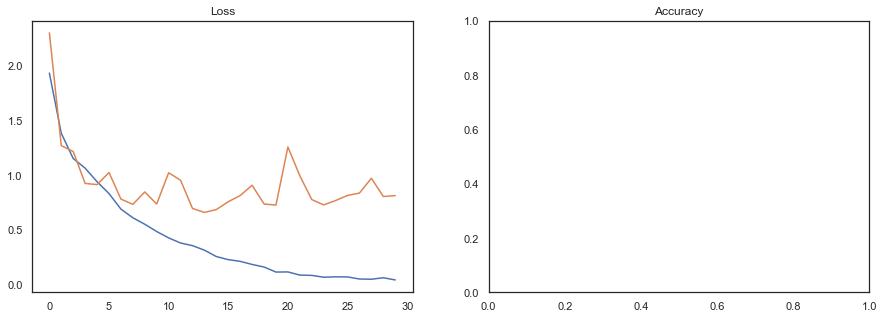

In [24]:
show_final_history(history)